# Multi-armed bandits

River has a `bandit` module. It contains several multi-armed bandit policies, bandit environments, and utilities to benchmark policies on bandit problems.

Bandit environments in River implement the [Gym](https://www.gymlibrary.dev/) interface. You can thus load them with `gym.make`. Note that Gym is intended for reinforcement learning algorithms, while bandit policies are the simplest form of reinforcement learning. Bandit policies learn by receiving a reward after each step, while reinforcement learning algorithms have to learn from feedback that may arrive at the end of a (long) sequence of steps.

In [1]:
import gymnasium as gym

for k in gym.envs.registry:
    if k.startswith('river_bandits'):
        print(k)


River's bandit module offers the `bandit.evaluate` function to benchmark several policies on a given environment. It takes as input a list of bandit policies, a bandit environment (the problem to solve), and a reward object.

In [2]:
import gymnasium as gym
from river import bandit
import pandas as pd
from tqdm import tqdm
from river import stats

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)

trace = bandit.evaluate(
    policies=policies,
    env=env,
    reward_stat=stats.Mean(),
    n_episodes=(n_episodes := 2000),
)


The `bandit.evaluate` function returns a generator containing the results at each step of the benchmark. This can be wrapped with a `pandas.DataFrame` to gather all the results.

In [3]:
trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))
trace_df.sample(5, random_state=42)


  0%|          | 0/6000000 [00:00<?, ?it/s]

  0%|          | 11234/6000000 [00:00<00:53, 112333.68it/s]

  0%|          | 22669/6000000 [00:00<00:52, 113516.60it/s]

  1%|          | 34120/6000000 [00:00<00:52, 113967.52it/s]

  1%|          | 45604/6000000 [00:00<00:52, 114310.92it/s]

  1%|          | 57323/6000000 [00:00<00:51, 115346.18it/s]

  1%|          | 68970/6000000 [00:00<00:51, 115726.89it/s]

  1%|▏         | 80543/6000000 [00:00<00:51, 115653.40it/s]

  2%|▏         | 92109/6000000 [00:00<00:51, 115495.01it/s]

  2%|▏         | 103659/6000000 [00:00<00:51, 115084.37it/s]

  2%|▏         | 115268/6000000 [00:01<00:50, 115392.30it/s]

  2%|▏         | 126840/6000000 [00:01<00:50, 115490.54it/s]

  2%|▏         | 138445/6000000 [00:01<00:50, 115658.65it/s]

  3%|▎         | 150014/6000000 [00:01<00:50, 115667.50it/s]

  3%|▎         | 161637/6000000 [00:01<00:50, 115835.55it/s]

  3%|▎         | 173221/6000000 [00:01<00:50, 115673.83it/s]

  3%|▎         | 184789/6000000 [00:01<00:50, 115532.73it/s]

  3%|▎         | 196343/6000000 [00:01<00:50, 114990.61it/s]

  3%|▎         | 207843/6000000 [00:01<00:50, 114963.77it/s]

  4%|▎         | 219447/6000000 [00:01<00:50, 115284.14it/s]

  4%|▍         | 231143/6000000 [00:02<00:49, 115785.47it/s]

  4%|▍         | 242918/6000000 [00:02<00:49, 116373.04it/s]

  4%|▍         | 254556/6000000 [00:02<00:49, 115783.17it/s]

  4%|▍         | 266136/6000000 [00:02<00:49, 115240.87it/s]

  5%|▍         | 277662/6000000 [00:02<00:49, 115010.02it/s]

  5%|▍         | 289185/6000000 [00:02<00:49, 115073.95it/s]

  5%|▌         | 301000/6000000 [00:02<00:49, 115991.31it/s]

  5%|▌         | 312600/6000000 [00:02<00:49, 115925.98it/s]

  5%|▌         | 324194/6000000 [00:02<00:49, 115658.20it/s]

  6%|▌         | 336001/6000000 [00:02<00:48, 115777.77it/s]

  6%|▌         | 347839/6000000 [00:03<00:48, 116550.84it/s]

  6%|▌         | 359585/6000000 [00:03<00:48, 116820.40it/s]

  6%|▌         | 371268/6000000 [00:03<00:48, 116431.31it/s]

  6%|▋         | 382912/6000000 [00:03<00:48, 115970.73it/s]

  7%|▋         | 394517/6000000 [00:03<00:48, 115992.67it/s]

  7%|▋         | 406117/6000000 [00:03<00:48, 115709.89it/s]

  7%|▋         | 417689/6000000 [00:03<00:48, 115264.55it/s]

  7%|▋         | 429216/6000000 [00:03<00:48, 115203.54it/s]

  7%|▋         | 441001/6000000 [00:03<00:48, 115713.78it/s]

  8%|▊         | 452800/6000000 [00:03<00:47, 116392.27it/s]

  8%|▊         | 464440/6000000 [00:04<00:56, 98109.50it/s] 

  8%|▊         | 476137/6000000 [00:04<00:53, 103099.74it/s]

  8%|▊         | 487801/6000000 [00:04<00:51, 106814.58it/s]

  8%|▊         | 499259/6000000 [00:04<00:50, 109000.98it/s]

  9%|▊         | 510822/6000000 [00:04<00:49, 110901.44it/s]

  9%|▊         | 522272/6000000 [00:04<00:48, 111945.76it/s]

  9%|▉         | 533905/6000000 [00:04<00:48, 113230.94it/s]

  9%|▉         | 545372/6000000 [00:04<00:47, 113654.57it/s]

  9%|▉         | 556950/6000000 [00:04<00:47, 114283.67it/s]

  9%|▉         | 568463/6000000 [00:04<00:47, 114534.60it/s]

 10%|▉         | 579996/6000000 [00:05<00:47, 114771.24it/s]

 10%|▉         | 591598/6000000 [00:05<00:46, 115141.70it/s]

 10%|█         | 603205/6000000 [00:05<00:46, 115417.17it/s]

 10%|█         | 614995/6000000 [00:05<00:46, 116158.50it/s]

 10%|█         | 626768/6000000 [00:05<00:46, 116627.36it/s]

 11%|█         | 638536/6000000 [00:05<00:45, 116941.72it/s]

 11%|█         | 650235/6000000 [00:05<00:47, 111809.82it/s]

 11%|█         | 661697/6000000 [00:05<00:47, 112623.94it/s]

 11%|█         | 673133/6000000 [00:05<00:47, 113132.18it/s]

 11%|█▏        | 684683/6000000 [00:05<00:46, 113820.52it/s]

 12%|█▏        | 696219/6000000 [00:06<00:46, 114276.27it/s]

 12%|█▏        | 708001/6000000 [00:06<00:46, 114890.64it/s]

 12%|█▏        | 719981/6000000 [00:06<00:45, 116350.45it/s]

 12%|█▏        | 731705/6000000 [00:06<00:45, 116614.99it/s]

 12%|█▏        | 743373/6000000 [00:06<00:45, 115472.86it/s]

 13%|█▎        | 754966/6000000 [00:06<00:45, 115607.95it/s]

 13%|█▎        | 766532/6000000 [00:06<00:45, 115301.13it/s]

 13%|█▎        | 778178/6000000 [00:06<00:45, 115645.15it/s]

 13%|█▎        | 789745/6000000 [00:06<00:45, 115522.51it/s]

 13%|█▎        | 801299/6000000 [00:07<00:45, 114433.47it/s]

 14%|█▎        | 813001/6000000 [00:07<00:45, 114608.71it/s]

 14%|█▎        | 824978/6000000 [00:07<00:44, 116138.98it/s]

 14%|█▍        | 836613/6000000 [00:07<00:44, 116199.55it/s]

 14%|█▍        | 848236/6000000 [00:07<00:44, 115953.79it/s]

 14%|█▍        | 859963/6000000 [00:07<00:44, 116345.43it/s]

 15%|█▍        | 871675/6000000 [00:07<00:43, 116575.75it/s]

 15%|█▍        | 883334/6000000 [00:07<00:44, 115966.47it/s]

 15%|█▍        | 895089/6000000 [00:07<00:43, 116435.74it/s]

 15%|█▌        | 906734/6000000 [00:07<00:44, 115736.46it/s]

 15%|█▌        | 918310/6000000 [00:08<00:44, 115467.27it/s]

 16%|█▌        | 930001/6000000 [00:08<00:43, 115578.23it/s]

 16%|█▌        | 941731/6000000 [00:08<00:43, 116084.34it/s]

 16%|█▌        | 953341/6000000 [00:08<00:43, 115853.48it/s]

 16%|█▌        | 964927/6000000 [00:08<00:43, 115476.14it/s]

 16%|█▋        | 976476/6000000 [00:08<00:43, 115170.89it/s]

 16%|█▋        | 987994/6000000 [00:08<00:43, 115024.69it/s]

 17%|█▋        | 999497/6000000 [00:08<00:43, 115014.19it/s]

 17%|█▋        | 1011001/6000000 [00:08<00:43, 114828.22it/s]

 17%|█▋        | 1022705/6000000 [00:08<00:43, 115487.80it/s]

 17%|█▋        | 1034255/6000000 [00:09<00:43, 115466.60it/s]

 17%|█▋        | 1045802/6000000 [00:09<00:42, 115413.28it/s]

 18%|█▊        | 1057344/6000000 [00:09<00:42, 115317.58it/s]

 18%|█▊        | 1068961/6000000 [00:09<00:42, 115572.23it/s]

 18%|█▊        | 1080554/6000000 [00:09<00:42, 115677.56it/s]

 18%|█▊        | 1092122/6000000 [00:09<00:42, 115576.48it/s]

 18%|█▊        | 1103772/6000000 [00:09<00:42, 115851.82it/s]

 19%|█▊        | 1115516/6000000 [00:09<00:41, 116326.98it/s]

 19%|█▉        | 1127149/6000000 [00:09<00:41, 116028.92it/s]

 19%|█▉        | 1138778/6000000 [00:09<00:41, 116105.86it/s]

 19%|█▉        | 1150389/6000000 [00:10<00:41, 115726.89it/s]

 19%|█▉        | 1161963/6000000 [00:10<00:41, 115707.75it/s]

 20%|█▉        | 1173572/6000000 [00:10<00:41, 115821.26it/s]

 20%|█▉        | 1185155/6000000 [00:10<00:41, 115732.93it/s]

 20%|█▉        | 1197001/6000000 [00:10<00:41, 116292.15it/s]

 20%|██        | 1208631/6000000 [00:10<00:41, 115941.09it/s]

 20%|██        | 1220290/6000000 [00:10<00:41, 116134.01it/s]

 21%|██        | 1231904/6000000 [00:10<00:41, 116078.13it/s]

 21%|██        | 1243512/6000000 [00:10<00:41, 115521.23it/s]

 21%|██        | 1255087/6000000 [00:10<00:41, 115587.82it/s]

 21%|██        | 1266678/6000000 [00:11<00:40, 115683.59it/s]

 21%|██▏       | 1278247/6000000 [00:11<00:40, 115508.76it/s]

 21%|██▏       | 1289958/6000000 [00:11<00:40, 115984.84it/s]

 22%|██▏       | 1301557/6000000 [00:11<00:40, 115913.77it/s]

 22%|██▏       | 1313193/6000000 [00:11<00:40, 116045.11it/s]

 22%|██▏       | 1324798/6000000 [00:11<00:40, 115490.57it/s]

 22%|██▏       | 1336348/6000000 [00:11<00:40, 115288.96it/s]

 22%|██▏       | 1347879/6000000 [00:11<00:40, 115293.06it/s]

 23%|██▎       | 1359458/6000000 [00:11<00:40, 115441.16it/s]

 23%|██▎       | 1371107/6000000 [00:11<00:39, 115753.78it/s]

 23%|██▎       | 1382932/6000000 [00:12<00:39, 116500.08it/s]

 23%|██▎       | 1394583/6000000 [00:12<00:39, 116355.85it/s]

 23%|██▎       | 1406219/6000000 [00:12<00:39, 116300.40it/s]

 24%|██▎       | 1417850/6000000 [00:12<00:39, 115831.35it/s]

 24%|██▍       | 1429534/6000000 [00:12<00:39, 116129.91it/s]

 24%|██▍       | 1441148/6000000 [00:12<00:39, 115806.01it/s]

 24%|██▍       | 1452730/6000000 [00:12<00:39, 115446.01it/s]

 24%|██▍       | 1464276/6000000 [00:12<00:39, 115296.11it/s]

 25%|██▍       | 1475994/6000000 [00:12<00:39, 115856.61it/s]

 25%|██▍       | 1487581/6000000 [00:12<00:39, 115355.85it/s]

 25%|██▍       | 1499118/6000000 [00:13<00:39, 115152.48it/s]

 25%|██▌       | 1510634/6000000 [00:13<00:39, 115052.65it/s]

 25%|██▌       | 1522178/6000000 [00:13<00:38, 115165.71it/s]

 26%|██▌       | 1533695/6000000 [00:13<00:38, 115125.31it/s]

 26%|██▌       | 1545276/6000000 [00:13<00:38, 115327.65it/s]

 26%|██▌       | 1557001/6000000 [00:13<00:38, 115460.37it/s]

 26%|██▌       | 1568940/6000000 [00:13<00:37, 116633.99it/s]

 26%|██▋       | 1580604/6000000 [00:13<00:38, 116291.30it/s]

 27%|██▋       | 1592234/6000000 [00:13<00:38, 115806.82it/s]

 27%|██▋       | 1603816/6000000 [00:13<00:38, 115684.25it/s]

 27%|██▋       | 1615385/6000000 [00:14<00:37, 115609.71it/s]

 27%|██▋       | 1626947/6000000 [00:14<00:37, 115565.22it/s]

 27%|██▋       | 1638504/6000000 [00:14<00:37, 115299.61it/s]

 28%|██▊       | 1650087/6000000 [00:14<00:37, 115455.46it/s]

 28%|██▊       | 1661753/6000000 [00:14<00:37, 115813.61it/s]

 28%|██▊       | 1673388/6000000 [00:14<00:37, 115972.85it/s]

 28%|██▊       | 1684986/6000000 [00:14<00:37, 115572.81it/s]

 28%|██▊       | 1696544/6000000 [00:14<00:37, 115252.68it/s]

 28%|██▊       | 1708070/6000000 [00:14<00:37, 115092.11it/s]

 29%|██▊       | 1719580/6000000 [00:14<00:37, 114908.76it/s]

 29%|██▉       | 1731084/6000000 [00:15<00:37, 114946.62it/s]

 29%|██▉       | 1742922/6000000 [00:15<00:36, 115972.58it/s]

 29%|██▉       | 1754520/6000000 [00:15<00:36, 115358.52it/s]

 29%|██▉       | 1766057/6000000 [00:15<00:36, 115319.88it/s]

 30%|██▉       | 1777620/6000000 [00:15<00:36, 115409.96it/s]

 30%|██▉       | 1789162/6000000 [00:15<00:36, 115123.52it/s]

 30%|███       | 1800758/6000000 [00:15<00:36, 115372.60it/s]

 30%|███       | 1812296/6000000 [00:15<00:36, 115022.32it/s]

 30%|███       | 1824001/6000000 [00:15<00:36, 115495.21it/s]

 31%|███       | 1835757/6000000 [00:15<00:35, 116109.75it/s]

 31%|███       | 1847377/6000000 [00:16<00:35, 116135.79it/s]

 31%|███       | 1858991/6000000 [00:16<00:35, 115927.92it/s]

 31%|███       | 1870585/6000000 [00:16<00:35, 115920.07it/s]

 31%|███▏      | 1882178/6000000 [00:16<00:35, 115767.94it/s]

 32%|███▏      | 1893755/6000000 [00:16<00:35, 115530.96it/s]

 32%|███▏      | 1905357/6000000 [00:16<00:35, 115674.38it/s]

 32%|███▏      | 1917001/6000000 [00:16<00:35, 115431.86it/s]

 32%|███▏      | 1928709/6000000 [00:16<00:35, 115921.30it/s]

 32%|███▏      | 1940302/6000000 [00:16<00:35, 115792.82it/s]

 33%|███▎      | 1951882/6000000 [00:16<00:35, 115163.58it/s]

 33%|███▎      | 1963400/6000000 [00:17<00:35, 114989.86it/s]

 33%|███▎      | 1974942/6000000 [00:17<00:34, 115116.05it/s]

 33%|███▎      | 1986455/6000000 [00:17<00:34, 114940.54it/s]

 33%|███▎      | 1998001/6000000 [00:17<00:34, 115080.50it/s]

 33%|███▎      | 2009769/6000000 [00:17<00:34, 115855.34it/s]

 34%|███▎      | 2021355/6000000 [00:17<00:34, 115369.42it/s]

 34%|███▍      | 2032893/6000000 [00:17<00:34, 114968.94it/s]

 34%|███▍      | 2044411/6000000 [00:17<00:34, 115030.23it/s]

 34%|███▍      | 2055915/6000000 [00:17<00:34, 114812.79it/s]

 34%|███▍      | 2067724/6000000 [00:17<00:33, 115789.56it/s]

 35%|███▍      | 2079337/6000000 [00:18<00:33, 115888.22it/s]

 35%|███▍      | 2091053/6000000 [00:18<00:33, 116266.36it/s]

 35%|███▌      | 2102865/6000000 [00:18<00:33, 116819.28it/s]

 35%|███▌      | 2114548/6000000 [00:18<00:33, 116326.47it/s]

 35%|███▌      | 2126182/6000000 [00:18<00:33, 115750.99it/s]

 36%|███▌      | 2137759/6000000 [00:18<00:33, 115542.06it/s]

 36%|███▌      | 2149314/6000000 [00:18<00:33, 115314.31it/s]

 36%|███▌      | 2160846/6000000 [00:18<00:33, 115079.42it/s]

 36%|███▌      | 2172355/6000000 [00:18<00:33, 115026.38it/s]

 36%|███▋      | 2184001/6000000 [00:18<00:33, 115390.27it/s]

 37%|███▋      | 2195668/6000000 [00:19<00:32, 115771.61it/s]

 37%|███▋      | 2207246/6000000 [00:19<00:32, 115489.88it/s]

 37%|███▋      | 2218796/6000000 [00:19<00:32, 115163.87it/s]

 37%|███▋      | 2230313/6000000 [00:19<00:32, 115108.51it/s]

 37%|███▋      | 2241845/6000000 [00:19<00:32, 115170.30it/s]

 38%|███▊      | 2253505/6000000 [00:19<00:32, 115596.91it/s]

 38%|███▊      | 2265065/6000000 [00:19<00:32, 115427.50it/s]

 38%|███▊      | 2276863/6000000 [00:19<00:32, 116186.38it/s]

 38%|███▊      | 2288482/6000000 [00:19<00:32, 115780.04it/s]

 38%|███▊      | 2300061/6000000 [00:19<00:32, 115341.77it/s]

 39%|███▊      | 2311596/6000000 [00:20<00:32, 114760.72it/s]

 39%|███▊      | 2323073/6000000 [00:20<00:32, 114664.82it/s]

 39%|███▉      | 2334566/6000000 [00:20<00:31, 114741.60it/s]

 39%|███▉      | 2346041/6000000 [00:20<00:31, 114704.59it/s]

 39%|███▉      | 2357721/6000000 [00:20<00:31, 115329.05it/s]

 39%|███▉      | 2369255/6000000 [00:20<00:31, 115260.87it/s]

 40%|███▉      | 2380920/6000000 [00:20<00:31, 115674.36it/s]

 40%|███▉      | 2392488/6000000 [00:20<00:31, 115428.16it/s]

 40%|████      | 2404032/6000000 [00:20<00:31, 115035.14it/s]

 40%|████      | 2415536/6000000 [00:20<00:31, 115017.94it/s]

 40%|████      | 2427039/6000000 [00:21<00:31, 114886.49it/s]

 41%|████      | 2438813/6000000 [00:21<00:30, 115737.68it/s]

 41%|████      | 2450422/6000000 [00:21<00:30, 115839.80it/s]

 41%|████      | 2462007/6000000 [00:21<00:30, 115757.81it/s]

 41%|████      | 2473583/6000000 [00:21<00:30, 115249.11it/s]

 41%|████▏     | 2485116/6000000 [00:21<00:30, 115271.18it/s]

 42%|████▏     | 2496644/6000000 [00:21<00:30, 114960.17it/s]

 42%|████▏     | 2508146/6000000 [00:21<00:30, 114977.35it/s]

 42%|████▏     | 2519831/6000000 [00:21<00:30, 115536.54it/s]

 42%|████▏     | 2531386/6000000 [00:21<00:30, 115454.48it/s]

 42%|████▏     | 2542944/6000000 [00:22<00:29, 115490.04it/s]

 43%|████▎     | 2554494/6000000 [00:22<00:29, 115339.65it/s]

 43%|████▎     | 2566049/6000000 [00:22<00:29, 115401.27it/s]

 43%|████▎     | 2577590/6000000 [00:22<00:29, 115300.72it/s]

 43%|████▎     | 2589207/6000000 [00:22<00:29, 115558.41it/s]

 43%|████▎     | 2600892/6000000 [00:22<00:29, 115943.51it/s]

 44%|████▎     | 2612552/6000000 [00:22<00:29, 116139.25it/s]

 44%|████▎     | 2624167/6000000 [00:22<00:29, 113397.62it/s]

 44%|████▍     | 2635637/6000000 [00:22<00:29, 113780.59it/s]

 44%|████▍     | 2647168/6000000 [00:22<00:29, 114231.19it/s]

 44%|████▍     | 2658610/6000000 [00:23<00:29, 114285.85it/s]

 45%|████▍     | 2670178/6000000 [00:23<00:29, 114700.67it/s]

 45%|████▍     | 2682001/6000000 [00:23<00:28, 115401.72it/s]

 45%|████▍     | 2693701/6000000 [00:23<00:28, 115875.76it/s]

 45%|████▌     | 2705291/6000000 [00:23<00:35, 93336.80it/s] 

 45%|████▌     | 2716850/6000000 [00:23<00:33, 99030.62it/s]

 45%|████▌     | 2728354/6000000 [00:23<00:31, 103315.58it/s]

 46%|████▌     | 2739959/6000000 [00:23<00:30, 106837.06it/s]

 46%|████▌     | 2751662/6000000 [00:23<00:29, 109723.86it/s]

 46%|████▌     | 2762900/6000000 [00:24<00:29, 110069.12it/s]

 46%|████▌     | 2774348/6000000 [00:24<00:28, 111349.09it/s]

 46%|████▋     | 2785733/6000000 [00:24<00:28, 112080.96it/s]

 47%|████▋     | 2797135/6000000 [00:24<00:28, 112652.51it/s]

 47%|████▋     | 2808641/6000000 [00:24<00:28, 113365.55it/s]

 47%|████▋     | 2820134/6000000 [00:24<00:27, 113830.71it/s]

 47%|████▋     | 2831974/6000000 [00:24<00:27, 115192.75it/s]

 47%|████▋     | 2843518/6000000 [00:24<00:27, 115075.54it/s]

 48%|████▊     | 2855043/6000000 [00:24<00:27, 115098.60it/s]

 48%|████▊     | 2866565/6000000 [00:24<00:27, 114922.33it/s]

 48%|████▊     | 2878066/6000000 [00:25<00:27, 114717.45it/s]

 48%|████▊     | 2889709/6000000 [00:25<00:26, 115226.89it/s]

 48%|████▊     | 2901238/6000000 [00:25<00:26, 115243.50it/s]

 49%|████▊     | 2912931/6000000 [00:25<00:26, 115746.82it/s]

 49%|████▊     | 2924508/6000000 [00:25<00:26, 115355.96it/s]

 49%|████▉     | 2936046/6000000 [00:25<00:26, 114940.87it/s]

 49%|████▉     | 2947612/6000000 [00:25<00:26, 115153.04it/s]

 49%|████▉     | 2959129/6000000 [00:25<00:26, 114945.69it/s]

 50%|████▉     | 2970704/6000000 [00:25<00:26, 115183.58it/s]

 50%|████▉     | 2982313/6000000 [00:25<00:26, 115452.44it/s]

 50%|████▉     | 2993978/6000000 [00:26<00:25, 115810.58it/s]

 50%|█████     | 3005560/6000000 [00:26<00:25, 115770.35it/s]

 50%|█████     | 3017138/6000000 [00:26<00:25, 115591.02it/s]

 50%|█████     | 3028781/6000000 [00:26<00:25, 115841.77it/s]

 51%|█████     | 3040366/6000000 [00:26<00:25, 115445.73it/s]

 51%|█████     | 3051927/6000000 [00:26<00:25, 115493.64it/s]

 51%|█████     | 3063546/6000000 [00:26<00:25, 115699.53it/s]

 51%|█████▏    | 3075246/6000000 [00:26<00:25, 116088.06it/s]

 51%|█████▏    | 3086940/6000000 [00:26<00:25, 116342.54it/s]

 52%|█████▏    | 3098665/6000000 [00:26<00:24, 116613.92it/s]

 52%|█████▏    | 3110327/6000000 [00:27<00:25, 115164.81it/s]

 52%|█████▏    | 3121848/6000000 [00:27<00:25, 115032.43it/s]

 52%|█████▏    | 3133417/6000000 [00:27<00:24, 115226.74it/s]

 52%|█████▏    | 3144942/6000000 [00:27<00:24, 114952.33it/s]

 53%|█████▎    | 3156439/6000000 [00:27<00:24, 114954.93it/s]

 53%|█████▎    | 3168001/6000000 [00:27<00:24, 115148.16it/s]

 53%|█████▎    | 3179806/6000000 [00:27<00:24, 116015.44it/s]

 53%|█████▎    | 3191409/6000000 [00:27<00:24, 115637.60it/s]

 53%|█████▎    | 3202974/6000000 [00:27<00:24, 115332.54it/s]

 54%|█████▎    | 3214508/6000000 [00:27<00:24, 115275.78it/s]

 54%|█████▍    | 3226036/6000000 [00:28<00:24, 115121.98it/s]

 54%|█████▍    | 3237551/6000000 [00:28<00:23, 115129.24it/s]

 54%|█████▍    | 3249065/6000000 [00:28<00:23, 114876.82it/s]

 54%|█████▍    | 3260823/6000000 [00:28<00:23, 115682.82it/s]

 55%|█████▍    | 3272392/6000000 [00:28<00:23, 115420.68it/s]

 55%|█████▍    | 3283935/6000000 [00:28<00:23, 115003.36it/s]

 55%|█████▍    | 3295535/6000000 [00:28<00:23, 115300.54it/s]

 55%|█████▌    | 3307066/6000000 [00:28<00:23, 114825.29it/s]

 55%|█████▌    | 3318573/6000000 [00:28<00:23, 114897.37it/s]

 56%|█████▌    | 3330128/6000000 [00:28<00:23, 115091.57it/s]

 56%|█████▌    | 3341791/6000000 [00:29<00:23, 115551.11it/s]

 56%|█████▌    | 3353347/6000000 [00:29<00:22, 115290.33it/s]

 56%|█████▌    | 3364877/6000000 [00:29<00:22, 115263.33it/s]

 56%|█████▋    | 3376404/6000000 [00:29<00:22, 114954.01it/s]

 56%|█████▋    | 3387924/6000000 [00:29<00:22, 115024.80it/s]

 57%|█████▋    | 3399487/6000000 [00:29<00:22, 115203.00it/s]

 57%|█████▋    | 3411158/6000000 [00:29<00:22, 115653.53it/s]

 57%|█████▋    | 3422896/6000000 [00:29<00:22, 116169.89it/s]

 57%|█████▋    | 3434514/6000000 [00:29<00:22, 115588.11it/s]

 57%|█████▋    | 3446234/6000000 [00:29<00:22, 116069.30it/s]

 58%|█████▊    | 3457842/6000000 [00:30<00:21, 115645.96it/s]

 58%|█████▊    | 3469408/6000000 [00:30<00:21, 115555.41it/s]

 58%|█████▊    | 3480965/6000000 [00:30<00:21, 115433.96it/s]

 58%|█████▊    | 3492538/6000000 [00:30<00:21, 115521.43it/s]

 58%|█████▊    | 3504284/6000000 [00:30<00:21, 116098.90it/s]

 59%|█████▊    | 3516001/6000000 [00:30<00:21, 116210.45it/s]

 59%|█████▉    | 3527797/6000000 [00:30<00:21, 116730.56it/s]

 59%|█████▉    | 3539471/6000000 [00:30<00:21, 116150.82it/s]

 59%|█████▉    | 3551087/6000000 [00:30<00:21, 115649.33it/s]

 59%|█████▉    | 3562653/6000000 [00:30<00:21, 115613.92it/s]

 60%|█████▉    | 3574215/6000000 [00:31<00:21, 115143.37it/s]

 60%|█████▉    | 3585766/6000000 [00:31<00:20, 115250.50it/s]

 60%|█████▉    | 3597292/6000000 [00:31<00:20, 114884.87it/s]

 60%|██████    | 3609001/6000000 [00:31<00:20, 115273.86it/s]

 60%|██████    | 3620637/6000000 [00:31<00:20, 115594.55it/s]

 61%|██████    | 3632197/6000000 [00:31<00:20, 115574.63it/s]

 61%|██████    | 3643755/6000000 [00:31<00:20, 115170.95it/s]

 61%|██████    | 3655287/6000000 [00:31<00:20, 115212.96it/s]

 61%|██████    | 3666809/6000000 [00:31<00:20, 115071.01it/s]

 61%|██████▏   | 3678386/6000000 [00:31<00:20, 115277.48it/s]

 62%|██████▏   | 3690001/6000000 [00:32<00:20, 115085.30it/s]

 62%|██████▏   | 3701582/6000000 [00:32<00:19, 115301.08it/s]

 62%|██████▏   | 3713133/6000000 [00:32<00:19, 115361.05it/s]

 62%|██████▏   | 3724670/6000000 [00:32<00:19, 114868.80it/s]

 62%|██████▏   | 3736158/6000000 [00:32<00:19, 114595.24it/s]

 62%|██████▏   | 3747618/6000000 [00:32<00:19, 114232.01it/s]

 63%|██████▎   | 3759145/6000000 [00:32<00:19, 114532.57it/s]

 63%|██████▎   | 3770977/6000000 [00:32<00:19, 115662.74it/s]

 63%|██████▎   | 3782545/6000000 [00:32<00:19, 115366.77it/s]

 63%|██████▎   | 3794083/6000000 [00:33<00:19, 115020.06it/s]

 63%|██████▎   | 3805586/6000000 [00:33<00:19, 114724.17it/s]

 64%|██████▎   | 3817097/6000000 [00:33<00:19, 114837.31it/s]

 64%|██████▍   | 3828582/6000000 [00:33<00:18, 114726.83it/s]

 64%|██████▍   | 3840202/6000000 [00:33<00:18, 115165.74it/s]

 64%|██████▍   | 3851921/6000000 [00:33<00:18, 115769.93it/s]

 64%|██████▍   | 3863499/6000000 [00:33<00:18, 115490.35it/s]

 65%|██████▍   | 3875049/6000000 [00:33<00:18, 115300.02it/s]

 65%|██████▍   | 3886580/6000000 [00:33<00:18, 115189.20it/s]

 65%|██████▍   | 3898238/6000000 [00:33<00:18, 115602.79it/s]

 65%|██████▌   | 3909799/6000000 [00:34<00:18, 115479.28it/s]

 65%|██████▌   | 3921348/6000000 [00:34<00:18, 115251.72it/s]

 66%|██████▌   | 3933001/6000000 [00:34<00:17, 115520.42it/s]

 66%|██████▌   | 3944701/6000000 [00:34<00:17, 115961.12it/s]

 66%|██████▌   | 3956298/6000000 [00:34<00:17, 115644.08it/s]

 66%|██████▌   | 3967863/6000000 [00:34<00:17, 115327.78it/s]

 66%|██████▋   | 3979397/6000000 [00:34<00:17, 114745.00it/s]

 67%|██████▋   | 3990873/6000000 [00:34<00:17, 114577.39it/s]

 67%|██████▋   | 4002352/6000000 [00:34<00:17, 114638.97it/s]

 67%|██████▋   | 4014001/6000000 [00:34<00:17, 114706.45it/s]

 67%|██████▋   | 4025763/6000000 [00:35<00:17, 115574.15it/s]

 67%|██████▋   | 4037322/6000000 [00:35<00:17, 115112.32it/s]

 67%|██████▋   | 4048834/6000000 [00:35<00:16, 114843.22it/s]

 68%|██████▊   | 4060395/6000000 [00:35<00:16, 115071.10it/s]

 68%|██████▊   | 4071975/6000000 [00:35<00:16, 115287.38it/s]

 68%|██████▊   | 4083505/6000000 [00:35<00:16, 115127.53it/s]

 68%|██████▊   | 4095019/6000000 [00:35<00:16, 115117.09it/s]

 68%|██████▊   | 4106799/6000000 [00:35<00:16, 115919.36it/s]

 69%|██████▊   | 4118392/6000000 [00:35<00:16, 115569.32it/s]

 69%|██████▉   | 4129950/6000000 [00:35<00:16, 115280.19it/s]

 69%|██████▉   | 4141479/6000000 [00:36<00:16, 114930.84it/s]

 69%|██████▉   | 4152973/6000000 [00:36<00:16, 114341.41it/s]

 69%|██████▉   | 4164616/6000000 [00:36<00:15, 114961.88it/s]

 70%|██████▉   | 4176186/6000000 [00:36<00:15, 115180.77it/s]

 70%|██████▉   | 4187957/6000000 [00:36<00:15, 115934.69it/s]

 70%|██████▉   | 4199552/6000000 [00:36<00:15, 115726.93it/s]

 70%|███████   | 4211126/6000000 [00:36<00:15, 115313.06it/s]

 70%|███████   | 4222658/6000000 [00:36<00:15, 115105.71it/s]

 71%|███████   | 4234170/6000000 [00:36<00:15, 115061.34it/s]

 71%|███████   | 4245690/6000000 [00:36<00:15, 115101.35it/s]

 71%|███████   | 4257201/6000000 [00:37<00:15, 114598.40it/s]

 71%|███████   | 4268875/6000000 [00:37<00:15, 115237.27it/s]

 71%|███████▏  | 4280559/6000000 [00:37<00:14, 115715.11it/s]

 72%|███████▏  | 4292272/6000000 [00:37<00:14, 116136.20it/s]

 72%|███████▏  | 4303907/6000000 [00:37<00:14, 116199.52it/s]

 72%|███████▏  | 4315531/6000000 [00:37<00:14, 116209.94it/s]

 72%|███████▏  | 4327160/6000000 [00:37<00:14, 116231.23it/s]

 72%|███████▏  | 4338786/6000000 [00:37<00:14, 116238.89it/s]

 73%|███████▎  | 4350411/6000000 [00:37<00:14, 116098.82it/s]

 73%|███████▎  | 4362071/6000000 [00:37<00:14, 116247.13it/s]

 73%|███████▎  | 4373914/6000000 [00:38<00:13, 116898.81it/s]

 73%|███████▎  | 4385605/6000000 [00:38<00:13, 116419.35it/s]

 73%|███████▎  | 4397248/6000000 [00:38<00:13, 116115.30it/s]

 73%|███████▎  | 4408860/6000000 [00:38<00:13, 115688.41it/s]

 74%|███████▎  | 4420492/6000000 [00:38<00:13, 115875.64it/s]

 74%|███████▍  | 4432081/6000000 [00:38<00:13, 115545.23it/s]

 74%|███████▍  | 4443636/6000000 [00:38<00:13, 115186.22it/s]

 74%|███████▍  | 4455156/6000000 [00:38<00:13, 114880.01it/s]

 74%|███████▍  | 4466902/6000000 [00:38<00:13, 115649.10it/s]

 75%|███████▍  | 4478468/6000000 [00:38<00:13, 115571.63it/s]

 75%|███████▍  | 4490026/6000000 [00:39<00:13, 115393.19it/s]

 75%|███████▌  | 4501566/6000000 [00:39<00:12, 115386.78it/s]

 75%|███████▌  | 4513105/6000000 [00:39<00:12, 115153.86it/s]

 75%|███████▌  | 4524621/6000000 [00:39<00:12, 115065.15it/s]

 76%|███████▌  | 4536209/6000000 [00:39<00:12, 115307.24it/s]

 76%|███████▌  | 4548026/6000000 [00:39<00:12, 116163.12it/s]

 76%|███████▌  | 4559953/6000000 [00:39<00:12, 117091.35it/s]

 76%|███████▌  | 4571663/6000000 [00:39<00:12, 116393.43it/s]

 76%|███████▋  | 4583304/6000000 [00:39<00:12, 116099.85it/s]

 77%|███████▋  | 4594915/6000000 [00:39<00:12, 115624.18it/s]

 77%|███████▋  | 4606479/6000000 [00:40<00:12, 115604.53it/s]

 77%|███████▋  | 4618040/6000000 [00:40<00:11, 115412.06it/s]

 77%|███████▋  | 4629706/6000000 [00:40<00:11, 115782.81it/s]

 77%|███████▋  | 4641343/6000000 [00:40<00:11, 115940.92it/s]

 78%|███████▊  | 4653001/6000000 [00:40<00:11, 116019.47it/s]

 78%|███████▊  | 4664882/6000000 [00:40<00:11, 116853.48it/s]

 78%|███████▊  | 4676568/6000000 [00:40<00:11, 116191.03it/s]

 78%|███████▊  | 4688189/6000000 [00:40<00:11, 115672.15it/s]

 78%|███████▊  | 4699758/6000000 [00:40<00:11, 115418.89it/s]

 79%|███████▊  | 4711522/6000000 [00:40<00:11, 116078.34it/s]

 79%|███████▊  | 4723131/6000000 [00:41<00:11, 115729.96it/s]

 79%|███████▉  | 4734705/6000000 [00:41<00:10, 115453.69it/s]

 79%|███████▉  | 4746265/6000000 [00:41<00:10, 115495.57it/s]

 79%|███████▉  | 4758001/6000000 [00:41<00:10, 115606.10it/s]

 79%|███████▉  | 4769829/6000000 [00:41<00:10, 116400.96it/s]

 80%|███████▉  | 4781470/6000000 [00:41<00:10, 115783.84it/s]

 80%|███████▉  | 4793050/6000000 [00:41<00:10, 115720.10it/s]

 80%|████████  | 4804623/6000000 [00:41<00:10, 115413.88it/s]

 80%|████████  | 4816165/6000000 [00:41<00:10, 115073.84it/s]

 80%|████████  | 4827757/6000000 [00:41<00:10, 115325.27it/s]

 81%|████████  | 4839377/6000000 [00:42<00:10, 115585.34it/s]

 81%|████████  | 4851001/6000000 [00:42<00:09, 115693.50it/s]

 81%|████████  | 4862700/6000000 [00:42<00:09, 116079.18it/s]

 81%|████████  | 4874309/6000000 [00:42<00:09, 115233.30it/s]

 81%|████████▏ | 4885834/6000000 [00:42<00:09, 114830.18it/s]

 82%|████████▏ | 4897328/6000000 [00:42<00:09, 114862.12it/s]

 82%|████████▏ | 4909020/6000000 [00:42<00:09, 115474.37it/s]

 82%|████████▏ | 4920861/6000000 [00:42<00:09, 116349.99it/s]

 82%|████████▏ | 4932497/6000000 [00:42<00:09, 116152.46it/s]

 82%|████████▏ | 4944113/6000000 [00:42<00:09, 116004.09it/s]

 83%|████████▎ | 4955786/6000000 [00:43<00:08, 116218.36it/s]

 83%|████████▎ | 4967409/6000000 [00:43<00:11, 87420.06it/s] 

 83%|████████▎ | 4978842/6000000 [00:43<00:10, 93967.88it/s]

 83%|████████▎ | 4990404/6000000 [00:43<00:10, 99552.47it/s]

 83%|████████▎ | 5002037/6000000 [00:43<00:09, 104069.29it/s]

 84%|████████▎ | 5013542/6000000 [00:43<00:09, 107117.53it/s]

 84%|████████▍ | 5025116/6000000 [00:43<00:08, 109565.56it/s]

 84%|████████▍ | 5036890/6000000 [00:43<00:08, 111924.20it/s]

 84%|████████▍ | 5048315/6000000 [00:43<00:08, 112600.70it/s]

 84%|████████▍ | 5059736/6000000 [00:44<00:08, 113072.68it/s]

 85%|████████▍ | 5071212/6000000 [00:44<00:08, 113571.15it/s]

 85%|████████▍ | 5082666/6000000 [00:44<00:08, 113857.27it/s]

 85%|████████▍ | 5094168/6000000 [00:44<00:07, 114201.64it/s]

 85%|████████▌ | 5105983/6000000 [00:44<00:07, 115378.83it/s]

 85%|████████▌ | 5117549/6000000 [00:44<00:07, 115245.13it/s]

 85%|████████▌ | 5129093/6000000 [00:44<00:07, 115049.64it/s]

 86%|████████▌ | 5140612/6000000 [00:44<00:07, 115009.52it/s]

 86%|████████▌ | 5152123/6000000 [00:44<00:07, 114908.29it/s]

 86%|████████▌ | 5163621/6000000 [00:44<00:07, 114792.83it/s]

 86%|████████▋ | 5175105/6000000 [00:45<00:07, 114596.31it/s]

 86%|████████▋ | 5186871/6000000 [00:45<00:07, 115511.57it/s]

 87%|████████▋ | 5198425/6000000 [00:45<00:06, 115167.25it/s]

 87%|████████▋ | 5209944/6000000 [00:45<00:06, 115030.73it/s]

 87%|████████▋ | 5221449/6000000 [00:45<00:06, 114857.82it/s]

 87%|████████▋ | 5233070/6000000 [00:45<00:06, 115259.26it/s]

 87%|████████▋ | 5244605/6000000 [00:45<00:06, 115284.72it/s]

 88%|████████▊ | 5256320/6000000 [00:45<00:06, 115841.77it/s]

 88%|████████▊ | 5268070/6000000 [00:45<00:06, 116336.08it/s]

 88%|████████▊ | 5279828/6000000 [00:45<00:06, 116707.29it/s]

 88%|████████▊ | 5291500/6000000 [00:46<00:06, 116229.01it/s]

 88%|████████▊ | 5303124/6000000 [00:46<00:06, 115715.70it/s]

 89%|████████▊ | 5314697/6000000 [00:46<00:05, 115612.51it/s]

 89%|████████▉ | 5326318/6000000 [00:46<00:05, 115790.41it/s]

 89%|████████▉ | 5337898/6000000 [00:46<00:05, 115506.79it/s]

 89%|████████▉ | 5349450/6000000 [00:46<00:05, 115396.98it/s]

 89%|████████▉ | 5361001/6000000 [00:46<00:05, 115366.91it/s]

 90%|████████▉ | 5372887/6000000 [00:46<00:05, 116409.36it/s]

 90%|████████▉ | 5384529/6000000 [00:46<00:05, 116130.81it/s]

 90%|████████▉ | 5396143/6000000 [00:46<00:05, 115711.39it/s]

 90%|█████████ | 5407715/6000000 [00:47<00:05, 114567.27it/s]

 90%|█████████ | 5419427/6000000 [00:47<00:05, 115322.99it/s]

 91%|█████████ | 5430962/6000000 [00:47<00:04, 115175.02it/s]

 91%|█████████ | 5442482/6000000 [00:47<00:04, 115047.21it/s]

 91%|█████████ | 5454116/6000000 [00:47<00:04, 115432.31it/s]

 91%|█████████ | 5465807/6000000 [00:47<00:04, 115872.10it/s]

 91%|█████████▏| 5477396/6000000 [00:47<00:04, 115868.90it/s]

 91%|█████████▏| 5488984/6000000 [00:47<00:04, 115358.47it/s]

 92%|█████████▏| 5500599/6000000 [00:47<00:04, 115592.46it/s]

 92%|█████████▏| 5512159/6000000 [00:47<00:04, 115228.54it/s]

 92%|█████████▏| 5523683/6000000 [00:48<00:04, 115141.39it/s]

 92%|█████████▏| 5535198/6000000 [00:48<00:04, 114874.90it/s]

 92%|█████████▏| 5546940/6000000 [00:48<00:03, 115632.97it/s]

 93%|█████████▎| 5558504/6000000 [00:48<00:03, 115500.93it/s]

 93%|█████████▎| 5570055/6000000 [00:48<00:03, 115081.72it/s]

 93%|█████████▎| 5581564/6000000 [00:48<00:03, 115039.26it/s]

 93%|█████████▎| 5593069/6000000 [00:48<00:03, 114844.16it/s]

 93%|█████████▎| 5604616/6000000 [00:48<00:03, 115028.72it/s]

 94%|█████████▎| 5616168/6000000 [00:48<00:03, 115173.46it/s]

 94%|█████████▍| 5628001/6000000 [00:48<00:03, 116037.96it/s]

 94%|█████████▍| 5639714/6000000 [00:49<00:03, 116361.96it/s]

 94%|█████████▍| 5651351/6000000 [00:49<00:03, 115978.48it/s]

 94%|█████████▍| 5662950/6000000 [00:49<00:02, 115671.79it/s]

 95%|█████████▍| 5674518/6000000 [00:49<00:02, 115470.04it/s]

 95%|█████████▍| 5686066/6000000 [00:49<00:02, 115284.67it/s]

 95%|█████████▍| 5697595/6000000 [00:49<00:02, 115275.46it/s]

 95%|█████████▌| 5709123/6000000 [00:49<00:02, 115128.72it/s]

 95%|█████████▌| 5720998/6000000 [00:49<00:02, 116209.56it/s]

 96%|█████████▌| 5732620/6000000 [00:49<00:02, 116088.43it/s]

 96%|█████████▌| 5744230/6000000 [00:49<00:02, 115535.76it/s]

 96%|█████████▌| 5755785/6000000 [00:50<00:02, 115534.86it/s]

 96%|█████████▌| 5767576/6000000 [00:50<00:01, 116244.47it/s]

 96%|█████████▋| 5779202/6000000 [00:50<00:01, 116107.07it/s]

 97%|█████████▋| 5790814/6000000 [00:50<00:01, 116033.74it/s]

 97%|█████████▋| 5802418/6000000 [00:50<00:01, 115778.44it/s]

 97%|█████████▋| 5814036/6000000 [00:50<00:01, 115894.60it/s]

 97%|█████████▋| 5825788/6000000 [00:50<00:01, 116380.67it/s]

 97%|█████████▋| 5837427/6000000 [00:50<00:01, 115901.36it/s]

 97%|█████████▋| 5849018/6000000 [00:50<00:01, 115531.14it/s]

 98%|█████████▊| 5860578/6000000 [00:50<00:01, 115550.98it/s]

 98%|█████████▊| 5872144/6000000 [00:51<00:01, 115582.78it/s]

 98%|█████████▊| 5883703/6000000 [00:51<00:01, 115328.58it/s]

 98%|█████████▊| 5895237/6000000 [00:51<00:00, 115113.16it/s]

 98%|█████████▊| 5907001/6000000 [00:51<00:00, 115347.57it/s]

 99%|█████████▊| 5918752/6000000 [00:51<00:00, 115990.16it/s]

 99%|█████████▉| 5930352/6000000 [00:51<00:00, 115763.62it/s]

 99%|█████████▉| 5941929/6000000 [00:51<00:00, 115655.10it/s]

 99%|█████████▉| 5953495/6000000 [00:51<00:00, 115152.79it/s]

 99%|█████████▉| 5965011/6000000 [00:51<00:00, 114833.57it/s]

100%|█████████▉| 5976731/6000000 [00:52<00:00, 115537.48it/s]

100%|█████████▉| 5988286/6000000 [00:52<00:00, 114917.34it/s]

100%|██████████| 6000000/6000000 [00:52<00:00, 114933.39it/s]

,episode,step,policy_idx,arm,reward,reward_stat
1324896,441,632,0,0,-0.819441,0.566676
3566176,1188,725,1,6,-0.037734,1.613718
1109043,369,681,0,2,-0.823526,0.198409
4286042,1428,680,2,4,3.647203,1.937864
5395174,1798,391,1,0,1.692452,0.898806


It is then straightforward to plot the average reward each policy obtains at each step, by averaging over episodes.

<Axes: xlabel='step'>

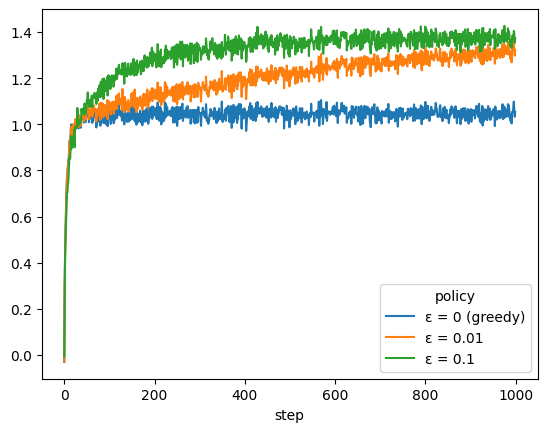

In [4]:
policy_names = {
    0: 'ε = 0.1',
    1: 'ε = 0.01',
    2: 'ε = 0 (greedy)'
}

(
    trace_df
    .assign(policy=trace_df.policy_idx.map(policy_names))
    .groupby(['step', 'policy'])
    ['reward'].mean()
    .unstack()
    .plot()
)


## Controlling the evaluation loop

The `bandit.evaluate` function is useful for benchmarking. But in practice, you'll want to have control over your bandit policy. Indeed you'll want the freedom to pull arms (with the `pull` method) and update the policy (with the `update` method) at your discretion.

As an example, the following is a possible reimplementation of the `bandit.evaluate` function. Here we'll be measuring the rate at which each policy selects the optimal arm.

Note how the `pull` and `update` methods are used.

In [5]:
import copy

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)
n_episodes = 2000

trace = []

with tqdm(total=len(policies) * n_episodes * env._max_episode_steps, position=0) as progress:
    for policy in policies:
        for episode in range(n_episodes):
            episode_policy = policy.clone()
            episode_env = copy.deepcopy(env)
            episode_env.reset()
            step = 0
            while True:
                action = episode_policy.pull(range(episode_env.action_space.n))
                observation, reward, terminated, truncated, info = episode_env.step(action)
                best_action = observation
                episode_policy.update(action, reward)

                trace.append({
                    "episode": episode,
                    "step": step,
                    "policy": f"ε = {policy.epsilon}",
                    "is_action_optimal": action == best_action
                })
                step += 1
                progress.update()

                if terminated or truncated:
                    break

trace_df = pd.DataFrame(trace)


  0%|          | 0/6000000 [00:00<?, ?it/s]

  0%|          | 11764/6000000 [00:00<00:50, 117631.42it/s]

  0%|          | 23674/6000000 [00:00<00:50, 118492.34it/s]

  1%|          | 35561/6000000 [00:00<00:50, 118664.19it/s]

  1%|          | 47434/6000000 [00:00<00:50, 118687.76it/s]

  1%|          | 59303/6000000 [00:00<00:50, 118676.67it/s]

  1%|          | 71171/6000000 [00:00<00:50, 118558.97it/s]

  1%|▏         | 83041/6000000 [00:00<00:49, 118604.15it/s]

  2%|▏         | 95001/6000000 [00:00<00:49, 118779.14it/s]

  2%|▏         | 106936/6000000 [00:00<00:49, 118954.50it/s]

  2%|▏         | 118832/6000000 [00:01<00:49, 118836.32it/s]

  2%|▏         | 130716/6000000 [00:01<00:49, 118758.81it/s]

  2%|▏         | 142592/6000000 [00:01<00:49, 118429.98it/s]

  3%|▎         | 154488/6000000 [00:01<00:49, 118589.26it/s]

  3%|▎         | 166348/6000000 [00:01<00:49, 118492.72it/s]

  3%|▎         | 178228/6000000 [00:01<00:49, 118584.43it/s]

  3%|▎         | 190087/6000000 [00:01<00:48, 118586.05it/s]

  3%|▎         | 202014/6000000 [00:01<00:48, 118791.12it/s]

  4%|▎         | 213947/6000000 [00:01<00:48, 118950.59it/s]

  4%|▍         | 225843/6000000 [00:01<00:48, 118841.85it/s]

  4%|▍         | 237745/6000000 [00:02<00:48, 118892.43it/s]

  4%|▍         | 249658/6000000 [00:02<00:48, 118961.85it/s]

  4%|▍         | 261555/6000000 [00:02<00:48, 118813.67it/s]

  5%|▍         | 273506/6000000 [00:02<00:48, 119020.45it/s]

  5%|▍         | 285409/6000000 [00:02<00:48, 118807.14it/s]

  5%|▍         | 297290/6000000 [00:02<00:48, 118709.54it/s]

  5%|▌         | 309162/6000000 [00:02<00:47, 118658.57it/s]

  5%|▌         | 321028/6000000 [00:02<00:47, 118541.87it/s]

  6%|▌         | 332883/6000000 [00:02<00:47, 118505.34it/s]

  6%|▌         | 344734/6000000 [00:02<00:47, 118261.41it/s]

  6%|▌         | 356561/6000000 [00:03<00:47, 118232.63it/s]

  6%|▌         | 368388/6000000 [00:03<00:47, 118243.52it/s]

  6%|▋         | 380213/6000000 [00:03<00:47, 118205.98it/s]

  7%|▋         | 392034/6000000 [00:03<00:47, 118204.09it/s]

  7%|▋         | 403855/6000000 [00:03<00:47, 118020.93it/s]

  7%|▋         | 415681/6000000 [00:03<00:47, 118091.55it/s]

  7%|▋         | 427491/6000000 [00:03<00:47, 117906.78it/s]

  7%|▋         | 439282/6000000 [00:03<00:47, 117799.13it/s]

  8%|▊         | 451062/6000000 [00:03<00:47, 117600.22it/s]

  8%|▊         | 462883/6000000 [00:03<00:47, 117780.87it/s]

  8%|▊         | 474662/6000000 [00:04<00:46, 117695.66it/s]

  8%|▊         | 486432/6000000 [00:04<00:46, 117456.06it/s]

  8%|▊         | 498178/6000000 [00:04<00:46, 117380.16it/s]

  9%|▊         | 510001/6000000 [00:04<00:46, 117611.89it/s]

  9%|▊         | 521882/6000000 [00:04<00:46, 117968.36it/s]

  9%|▉         | 533679/6000000 [00:04<00:46, 117922.13it/s]

  9%|▉         | 545472/6000000 [00:04<00:46, 117851.86it/s]

  9%|▉         | 557258/6000000 [00:04<00:46, 117801.23it/s]

  9%|▉         | 569069/6000000 [00:04<00:46, 117891.01it/s]

 10%|▉         | 581001/6000000 [00:04<00:45, 118176.90it/s]

 10%|▉         | 592938/6000000 [00:05<00:45, 118533.59it/s]

 10%|█         | 604792/6000000 [00:05<00:45, 118462.07it/s]

 10%|█         | 616639/6000000 [00:05<00:45, 118172.70it/s]

 10%|█         | 628457/6000000 [00:05<00:45, 118024.19it/s]

 11%|█         | 640287/6000000 [00:05<00:45, 118104.81it/s]

 11%|█         | 652219/6000000 [00:05<00:45, 118467.45it/s]

 11%|█         | 664139/6000000 [00:05<00:44, 118684.25it/s]

 11%|█▏        | 676012/6000000 [00:05<00:44, 118697.57it/s]

 11%|█▏        | 687882/6000000 [00:05<00:44, 118510.62it/s]

 12%|█▏        | 699734/6000000 [00:05<00:44, 118408.44it/s]

 12%|█▏        | 711575/6000000 [00:06<00:44, 118196.43it/s]

 12%|█▏        | 723395/6000000 [00:06<00:44, 117902.85it/s]

 12%|█▏        | 735186/6000000 [00:06<00:44, 117685.92it/s]

 12%|█▏        | 747022/6000000 [00:06<00:44, 117885.57it/s]

 13%|█▎        | 758918/6000000 [00:06<00:44, 118205.99it/s]

 13%|█▎        | 770739/6000000 [00:06<00:44, 118145.82it/s]

 13%|█▎        | 782554/6000000 [00:06<00:44, 118082.77it/s]

 13%|█▎        | 794437/6000000 [00:06<00:44, 118305.19it/s]

 13%|█▎        | 806302/6000000 [00:06<00:43, 118406.95it/s]

 14%|█▎        | 818165/6000000 [00:06<00:43, 118472.32it/s]

 14%|█▍        | 830093/6000000 [00:07<00:43, 118714.10it/s]

 14%|█▍        | 842037/6000000 [00:07<00:43, 118930.72it/s]

 14%|█▍        | 853969/6000000 [00:07<00:43, 119046.40it/s]

 14%|█▍        | 865874/6000000 [00:07<00:43, 118997.64it/s]

 15%|█▍        | 877774/6000000 [00:07<00:43, 118774.37it/s]

 15%|█▍        | 889652/6000000 [00:07<00:43, 118681.51it/s]

 15%|█▌        | 901527/6000000 [00:07<00:42, 118701.04it/s]

 15%|█▌        | 913398/6000000 [00:07<00:42, 118468.31it/s]

 15%|█▌        | 925245/6000000 [00:07<00:42, 118345.37it/s]

 16%|█▌        | 937080/6000000 [00:07<00:42, 118314.20it/s]

 16%|█▌        | 948984/6000000 [00:08<00:42, 118529.80it/s]

 16%|█▌        | 960838/6000000 [00:08<00:42, 118527.05it/s]

 16%|█▌        | 972691/6000000 [00:08<00:42, 118102.78it/s]

 16%|█▋        | 984558/6000000 [00:08<00:42, 118271.09it/s]

 17%|█▋        | 996425/6000000 [00:08<00:42, 118389.35it/s]

 17%|█▋        | 1008265/6000000 [00:08<00:42, 118319.23it/s]

 17%|█▋        | 1020098/6000000 [00:08<00:42, 118234.84it/s]

 17%|█▋        | 1032001/6000000 [00:08<00:41, 118352.10it/s]

 17%|█▋        | 1043888/6000000 [00:08<00:41, 118506.80it/s]

 18%|█▊        | 1055791/6000000 [00:08<00:41, 118661.64it/s]

 18%|█▊        | 1067660/6000000 [00:09<00:41, 118668.73it/s]

 18%|█▊        | 1079527/6000000 [00:09<00:41, 118607.43it/s]

 18%|█▊        | 1091388/6000000 [00:09<00:41, 118323.59it/s]

 18%|█▊        | 1103256/6000000 [00:09<00:41, 118428.28it/s]

 19%|█▊        | 1115099/6000000 [00:09<00:41, 118405.66it/s]

 19%|█▉        | 1127001/6000000 [00:09<00:41, 118478.38it/s]

 19%|█▉        | 1138993/6000000 [00:09<00:40, 118908.71it/s]

 19%|█▉        | 1150884/6000000 [00:09<00:40, 118579.56it/s]

 19%|█▉        | 1162743/6000000 [00:09<00:40, 118386.46it/s]

 20%|█▉        | 1174582/6000000 [00:09<00:40, 118288.53it/s]

 20%|█▉        | 1186411/6000000 [00:10<00:40, 118210.58it/s]

 20%|█▉        | 1198233/6000000 [00:10<00:40, 117612.87it/s]

 20%|██        | 1209995/6000000 [00:10<00:40, 117226.35it/s]

 20%|██        | 1221719/6000000 [00:10<00:40, 116942.11it/s]

 21%|██        | 1233414/6000000 [00:10<00:40, 116562.75it/s]

 21%|██        | 1245071/6000000 [00:10<00:40, 116137.74it/s]

 21%|██        | 1256686/6000000 [00:10<00:40, 115913.23it/s]

 21%|██        | 1268278/6000000 [00:10<00:40, 115649.05it/s]

 21%|██▏       | 1279890/6000000 [00:10<00:40, 115788.61it/s]

 22%|██▏       | 1291470/6000000 [00:10<00:40, 115613.77it/s]

 22%|██▏       | 1303032/6000000 [00:11<00:40, 115492.34it/s]

 22%|██▏       | 1314617/6000000 [00:11<00:40, 115598.38it/s]

 22%|██▏       | 1326177/6000000 [00:11<00:40, 115230.92it/s]

 22%|██▏       | 1337904/6000000 [00:11<00:40, 115838.17it/s]

 22%|██▏       | 1349489/6000000 [00:11<00:40, 115718.85it/s]

 23%|██▎       | 1361128/6000000 [00:11<00:40, 115916.79it/s]

 23%|██▎       | 1372804/6000000 [00:11<00:39, 116168.88it/s]

 23%|██▎       | 1384429/6000000 [00:11<00:39, 116191.14it/s]

 23%|██▎       | 1396049/6000000 [00:11<00:39, 116101.66it/s]

 23%|██▎       | 1407668/6000000 [00:11<00:39, 116125.42it/s]

 24%|██▎       | 1419281/6000000 [00:12<00:39, 116023.77it/s]

 24%|██▍       | 1431000/6000000 [00:12<00:39, 116372.66it/s]

 24%|██▍       | 1442638/6000000 [00:12<00:39, 116113.01it/s]

 24%|██▍       | 1454250/6000000 [00:12<00:39, 116016.19it/s]

 24%|██▍       | 1465862/6000000 [00:12<00:39, 116045.39it/s]

 25%|██▍       | 1477467/6000000 [00:12<00:38, 116001.32it/s]

 25%|██▍       | 1489106/6000000 [00:12<00:38, 116116.65it/s]

 25%|██▌       | 1500747/6000000 [00:12<00:38, 116204.27it/s]

 25%|██▌       | 1512368/6000000 [00:12<00:38, 116039.39it/s]

 25%|██▌       | 1523986/6000000 [00:12<00:38, 116080.05it/s]

 26%|██▌       | 1535595/6000000 [00:13<00:38, 115999.27it/s]

 26%|██▌       | 1547195/6000000 [00:13<00:38, 115669.99it/s]

 26%|██▌       | 1558771/6000000 [00:13<00:38, 115696.70it/s]

 26%|██▌       | 1570341/6000000 [00:13<00:38, 115641.42it/s]

 26%|██▋       | 1582001/6000000 [00:13<00:38, 115791.20it/s]

 27%|██▋       | 1593678/6000000 [00:13<00:37, 116081.79it/s]

 27%|██▋       | 1605287/6000000 [00:13<00:37, 115988.02it/s]

 27%|██▋       | 1616970/6000000 [00:13<00:37, 116239.17it/s]

 27%|██▋       | 1628595/6000000 [00:13<00:37, 116120.90it/s]

 27%|██▋       | 1640208/6000000 [00:13<00:37, 115947.78it/s]

 28%|██▊       | 1651835/6000000 [00:14<00:37, 116044.03it/s]

 28%|██▊       | 1663440/6000000 [00:14<00:37, 116020.41it/s]

 28%|██▊       | 1675043/6000000 [00:14<00:37, 115818.95it/s]

 28%|██▊       | 1686746/6000000 [00:14<00:37, 116179.72it/s]

 28%|██▊       | 1698365/6000000 [00:14<00:37, 116109.61it/s]

 29%|██▊       | 1710002/6000000 [00:14<00:36, 116187.56it/s]

 29%|██▊       | 1721646/6000000 [00:14<00:36, 116262.83it/s]

 29%|██▉       | 1733273/6000000 [00:14<00:36, 116147.47it/s]

 29%|██▉       | 1744961/6000000 [00:14<00:36, 116364.66it/s]

 29%|██▉       | 1756598/6000000 [00:14<00:36, 116182.14it/s]

 29%|██▉       | 1768217/6000000 [00:15<00:36, 116012.15it/s]

 30%|██▉       | 1779836/6000000 [00:15<00:36, 116063.43it/s]

 30%|██▉       | 1791443/6000000 [00:15<00:36, 115879.15it/s]

 30%|███       | 1803032/6000000 [00:15<00:36, 115694.92it/s]

 30%|███       | 1814679/6000000 [00:15<00:36, 115926.61it/s]

 30%|███       | 1826299/6000000 [00:15<00:35, 116006.35it/s]

 31%|███       | 1837948/6000000 [00:15<00:35, 116150.87it/s]

 31%|███       | 1849564/6000000 [00:15<00:35, 115953.95it/s]

 31%|███       | 1861160/6000000 [00:15<00:35, 115867.45it/s]

 31%|███       | 1872806/6000000 [00:15<00:35, 116043.51it/s]

 31%|███▏      | 1884411/6000000 [00:16<00:35, 115821.69it/s]

 32%|███▏      | 1896001/6000000 [00:16<00:35, 115696.22it/s]

 32%|███▏      | 1907571/6000000 [00:16<00:35, 115204.78it/s]

 32%|███▏      | 1919154/6000000 [00:16<00:35, 115389.68it/s]

 32%|███▏      | 1930776/6000000 [00:16<00:35, 115636.17it/s]

 32%|███▏      | 1942364/6000000 [00:16<00:35, 115707.61it/s]

 33%|███▎      | 1953954/6000000 [00:16<00:34, 115764.36it/s]

 33%|███▎      | 1965545/6000000 [00:16<00:34, 115806.79it/s]

 33%|███▎      | 1977126/6000000 [00:16<00:34, 115580.22it/s]

 33%|███▎      | 1988720/6000000 [00:16<00:34, 115685.50it/s]

 33%|███▎      | 2000289/6000000 [00:17<00:34, 115604.06it/s]

 34%|███▎      | 2011850/6000000 [00:17<00:34, 114376.62it/s]

 34%|███▎      | 2023291/6000000 [00:17<00:35, 112805.07it/s]

 34%|███▍      | 2034578/6000000 [00:17<00:35, 112025.29it/s]

 34%|███▍      | 2045785/6000000 [00:17<00:35, 111325.78it/s]

 34%|███▍      | 2056921/6000000 [00:17<00:35, 111281.78it/s]

 34%|███▍      | 2068052/6000000 [00:17<00:35, 110990.05it/s]

 35%|███▍      | 2079153/6000000 [00:17<00:35, 110691.45it/s]

 35%|███▍      | 2090223/6000000 [00:17<00:35, 110214.97it/s]

 35%|███▌      | 2101266/6000000 [00:17<00:35, 110276.18it/s]

 35%|███▌      | 2112295/6000000 [00:18<00:35, 110259.49it/s]

 35%|███▌      | 2123322/6000000 [00:18<00:35, 110196.06it/s]

 36%|███▌      | 2134342/6000000 [00:18<00:35, 109924.35it/s]

 36%|███▌      | 2145335/6000000 [00:18<00:35, 109742.80it/s]

 36%|███▌      | 2156310/6000000 [00:18<00:35, 109727.40it/s]

 36%|███▌      | 2167283/6000000 [00:18<00:34, 109660.96it/s]

 36%|███▋      | 2178434/6000000 [00:18<00:34, 110213.41it/s]

 36%|███▋      | 2189456/6000000 [00:18<00:34, 110080.55it/s]

 37%|███▋      | 2200481/6000000 [00:18<00:34, 110129.19it/s]

 37%|███▋      | 2211561/6000000 [00:18<00:34, 110324.72it/s]

 37%|███▋      | 2222594/6000000 [00:19<00:34, 110177.16it/s]

 37%|███▋      | 2233670/6000000 [00:19<00:34, 110351.43it/s]

 37%|███▋      | 2244747/6000000 [00:19<00:33, 110476.02it/s]

 38%|███▊      | 2255868/6000000 [00:19<00:33, 110693.68it/s]

 38%|███▊      | 2266953/6000000 [00:19<00:33, 110740.11it/s]

 38%|███▊      | 2278028/6000000 [00:19<00:33, 110456.36it/s]

 38%|███▊      | 2289074/6000000 [00:19<00:33, 110399.02it/s]

 38%|███▊      | 2300115/6000000 [00:19<00:33, 110097.75it/s]

 39%|███▊      | 2311289/6000000 [00:19<00:33, 110588.00it/s]

 39%|███▊      | 2322349/6000000 [00:19<00:33, 110469.98it/s]

 39%|███▉      | 2333491/6000000 [00:20<00:33, 110753.87it/s]

 39%|███▉      | 2344567/6000000 [00:20<00:33, 110411.12it/s]

 39%|███▉      | 2355609/6000000 [00:20<00:33, 110154.99it/s]

 39%|███▉      | 2366628/6000000 [00:20<00:32, 110163.75it/s]

 40%|███▉      | 2377645/6000000 [00:20<00:32, 110014.45it/s]

 40%|███▉      | 2388713/6000000 [00:20<00:32, 110211.60it/s]

 40%|███▉      | 2399875/6000000 [00:20<00:32, 110630.83it/s]

 40%|████      | 2410939/6000000 [00:20<00:32, 110386.92it/s]

 40%|████      | 2421978/6000000 [00:20<00:32, 110108.54it/s]

 41%|████      | 2432990/6000000 [00:20<00:32, 110110.58it/s]

 41%|████      | 2444002/6000000 [00:21<00:32, 110078.80it/s]

 41%|████      | 2455018/6000000 [00:21<00:32, 110102.59it/s]

 41%|████      | 2466029/6000000 [00:21<00:32, 110051.16it/s]

 41%|████▏     | 2477035/6000000 [00:21<00:32, 110035.68it/s]

 41%|████▏     | 2488054/6000000 [00:21<00:31, 110080.70it/s]

 42%|████▏     | 2499139/6000000 [00:21<00:31, 110308.91it/s]

 42%|████▏     | 2510170/6000000 [00:21<00:31, 109917.01it/s]

 42%|████▏     | 2521163/6000000 [00:21<00:31, 109676.79it/s]

 42%|████▏     | 2532154/6000000 [00:21<00:31, 109744.11it/s]

 42%|████▏     | 2543209/6000000 [00:21<00:31, 109982.79it/s]

 43%|████▎     | 2554337/6000000 [00:22<00:31, 110370.04it/s]

 43%|████▎     | 2565375/6000000 [00:22<00:31, 110091.97it/s]

 43%|████▎     | 2576385/6000000 [00:22<00:31, 110057.74it/s]

 43%|████▎     | 2587444/6000000 [00:22<00:30, 110216.80it/s]

 43%|████▎     | 2598517/6000000 [00:22<00:30, 110367.89it/s]

 43%|████▎     | 2609649/6000000 [00:22<00:30, 110652.38it/s]

 44%|████▎     | 2620715/6000000 [00:22<00:30, 110637.62it/s]

 44%|████▍     | 2631900/6000000 [00:22<00:30, 111000.19it/s]

 44%|████▍     | 2643001/6000000 [00:22<00:30, 110595.32it/s]

 44%|████▍     | 2654061/6000000 [00:22<00:30, 110384.67it/s]

 44%|████▍     | 2665100/6000000 [00:23<00:30, 110345.39it/s]

 45%|████▍     | 2676135/6000000 [00:23<00:30, 109704.59it/s]

 45%|████▍     | 2687107/6000000 [00:23<00:30, 108577.05it/s]

 45%|████▍     | 2698143/6000000 [00:23<00:30, 109103.73it/s]

 45%|████▌     | 2709173/6000000 [00:23<00:30, 109459.07it/s]

 45%|████▌     | 2720121/6000000 [00:23<00:29, 109407.92it/s]

 46%|████▌     | 2731139/6000000 [00:23<00:29, 109636.55it/s]

 46%|████▌     | 2742224/6000000 [00:23<00:29, 109998.02it/s]

 46%|████▌     | 2753314/6000000 [00:23<00:29, 110266.89it/s]

 46%|████▌     | 2764350/6000000 [00:23<00:29, 110293.71it/s]

 46%|████▋     | 2775444/6000000 [00:24<00:29, 110485.84it/s]

 46%|████▋     | 2786493/6000000 [00:24<00:29, 110217.00it/s]

 47%|████▋     | 2797516/6000000 [00:24<00:29, 109781.64it/s]

 47%|████▋     | 2808495/6000000 [00:24<00:29, 109697.69it/s]

 47%|████▋     | 2819554/6000000 [00:24<00:28, 109962.33it/s]

 47%|████▋     | 2830598/6000000 [00:24<00:28, 110103.73it/s]

 47%|████▋     | 2841673/6000000 [00:24<00:28, 110296.04it/s]

 48%|████▊     | 2852703/6000000 [00:24<00:28, 110188.55it/s]

 48%|████▊     | 2863729/6000000 [00:24<00:28, 110209.59it/s]

 48%|████▊     | 2874809/6000000 [00:24<00:28, 110385.37it/s]

 48%|████▊     | 2885944/6000000 [00:25<00:28, 110672.58it/s]

 48%|████▊     | 2897012/6000000 [00:25<00:28, 110596.41it/s]

 48%|████▊     | 2908072/6000000 [00:25<00:28, 110315.53it/s]

 49%|████▊     | 2919235/6000000 [00:25<00:27, 110706.43it/s]

 49%|████▉     | 2930306/6000000 [00:25<00:27, 110611.25it/s]

 49%|████▉     | 2941368/6000000 [00:25<00:27, 110220.43it/s]

 49%|████▉     | 2952391/6000000 [00:25<00:27, 110167.67it/s]

 49%|████▉     | 2963409/6000000 [00:25<00:27, 110079.62it/s]

 50%|████▉     | 2974418/6000000 [00:25<00:27, 110054.42it/s]

 50%|████▉     | 2985424/6000000 [00:25<00:27, 110054.23it/s]

 50%|████▉     | 2996430/6000000 [00:26<00:27, 109975.33it/s]

 50%|█████     | 3007428/6000000 [00:26<00:27, 109265.25it/s]

 50%|█████     | 3018401/6000000 [00:26<00:27, 109402.37it/s]

 50%|█████     | 3029497/6000000 [00:26<00:27, 109865.27it/s]

 51%|█████     | 3040485/6000000 [00:26<00:26, 109804.46it/s]

 51%|█████     | 3051466/6000000 [00:26<00:27, 108523.46it/s]

 51%|█████     | 3062463/6000000 [00:26<00:26, 108952.94it/s]

 51%|█████     | 3073362/6000000 [00:26<00:26, 108958.36it/s]

 51%|█████▏    | 3084548/6000000 [00:26<00:26, 109823.46it/s]

 52%|█████▏    | 3095657/6000000 [00:26<00:26, 110201.75it/s]

 52%|█████▏    | 3106734/6000000 [00:27<00:26, 110369.25it/s]

 52%|█████▏    | 3117772/6000000 [00:27<00:26, 110242.77it/s]

 52%|█████▏    | 3128798/6000000 [00:27<00:26, 109950.35it/s]

 52%|█████▏    | 3139972/6000000 [00:27<00:25, 110484.56it/s]

 53%|█████▎    | 3151139/6000000 [00:27<00:25, 110839.00it/s]

 53%|█████▎    | 3162256/6000000 [00:27<00:25, 110937.22it/s]

 53%|█████▎    | 3173351/6000000 [00:27<00:25, 110754.11it/s]

 53%|█████▎    | 3184444/6000000 [00:27<00:25, 110806.64it/s]

 53%|█████▎    | 3195525/6000000 [00:27<00:25, 110557.36it/s]

 53%|█████▎    | 3206665/6000000 [00:27<00:25, 110807.87it/s]

 54%|█████▎    | 3217747/6000000 [00:28<00:25, 110601.01it/s]

 54%|█████▍    | 3228842/6000000 [00:28<00:25, 110705.23it/s]

 54%|█████▍    | 3239913/6000000 [00:28<00:24, 110480.23it/s]

 54%|█████▍    | 3250962/6000000 [00:28<00:24, 110257.46it/s]

 54%|█████▍    | 3261997/6000000 [00:28<00:24, 110285.09it/s]

 55%|█████▍    | 3273064/6000000 [00:28<00:24, 110399.69it/s]

 55%|█████▍    | 3284161/6000000 [00:28<00:24, 110567.62it/s]

 55%|█████▍    | 3295218/6000000 [00:28<00:24, 109893.72it/s]

 55%|█████▌    | 3306362/6000000 [00:28<00:24, 110354.25it/s]

 55%|█████▌    | 3317399/6000000 [00:29<00:24, 110288.25it/s]

 55%|█████▌    | 3328541/6000000 [00:29<00:24, 110625.70it/s]

 56%|█████▌    | 3339644/6000000 [00:29<00:24, 110745.35it/s]

 56%|█████▌    | 3350719/6000000 [00:29<00:23, 110579.81it/s]

 56%|█████▌    | 3361778/6000000 [00:29<00:23, 110548.65it/s]

 56%|█████▌    | 3372834/6000000 [00:29<00:23, 110482.18it/s]

 56%|█████▋    | 3383945/6000000 [00:29<00:23, 110670.10it/s]

 57%|█████▋    | 3395013/6000000 [00:29<00:23, 110210.89it/s]

 57%|█████▋    | 3406035/6000000 [00:29<00:23, 110065.33it/s]

 57%|█████▋    | 3417099/6000000 [00:29<00:23, 110235.11it/s]

 57%|█████▋    | 3428123/6000000 [00:30<00:23, 110150.94it/s]

 57%|█████▋    | 3439139/6000000 [00:30<00:23, 109759.00it/s]

 58%|█████▊    | 3450135/6000000 [00:30<00:23, 109818.38it/s]

 58%|█████▊    | 3461131/6000000 [00:30<00:23, 109856.15it/s]

 58%|█████▊    | 3472269/6000000 [00:30<00:22, 110311.38it/s]

 58%|█████▊    | 3483301/6000000 [00:30<00:22, 110108.89it/s]

 58%|█████▊    | 3494319/6000000 [00:30<00:22, 110128.87it/s]

 58%|█████▊    | 3505512/6000000 [00:30<00:22, 110667.25it/s]

 59%|█████▊    | 3516579/6000000 [00:30<00:22, 110556.74it/s]

 59%|█████▉    | 3527635/6000000 [00:30<00:22, 110284.44it/s]

 59%|█████▉    | 3538727/6000000 [00:31<00:22, 110473.19it/s]

 59%|█████▉    | 3549782/6000000 [00:31<00:22, 110494.17it/s]

 59%|█████▉    | 3560832/6000000 [00:31<00:22, 110351.63it/s]

 60%|█████▉    | 3571868/6000000 [00:31<00:22, 110210.97it/s]

 60%|█████▉    | 3583001/6000000 [00:31<00:21, 110471.77it/s]

 60%|█████▉    | 3594049/6000000 [00:31<00:21, 110434.70it/s]

 60%|██████    | 3605093/6000000 [00:31<00:21, 110253.82it/s]

 60%|██████    | 3616119/6000000 [00:31<00:21, 110239.50it/s]

 60%|██████    | 3627144/6000000 [00:31<00:21, 110209.78it/s]

 61%|██████    | 3638215/6000000 [00:31<00:21, 110359.11it/s]

 61%|██████    | 3649251/6000000 [00:32<00:21, 110152.02it/s]

 61%|██████    | 3660290/6000000 [00:32<00:21, 110220.62it/s]

 61%|██████    | 3671327/6000000 [00:32<00:21, 110260.44it/s]

 61%|██████▏   | 3682354/6000000 [00:32<00:21, 110100.81it/s]

 62%|██████▏   | 3693365/6000000 [00:32<00:20, 110049.53it/s]

 62%|██████▏   | 3704371/6000000 [00:32<00:20, 109955.25it/s]

 62%|██████▏   | 3715367/6000000 [00:32<00:20, 109816.04it/s]

 62%|██████▏   | 3726460/6000000 [00:32<00:20, 110149.48it/s]

 62%|██████▏   | 3737494/6000000 [00:32<00:20, 110205.48it/s]

 62%|██████▏   | 3748525/6000000 [00:32<00:20, 110233.68it/s]

 63%|██████▎   | 3759631/6000000 [00:33<00:20, 110479.29it/s]

 63%|██████▎   | 3770694/6000000 [00:33<00:20, 110523.88it/s]

 63%|██████▎   | 3781868/6000000 [00:33<00:20, 110887.26it/s]

 63%|██████▎   | 3792957/6000000 [00:33<00:19, 110419.35it/s]

 63%|██████▎   | 3804001/6000000 [00:33<00:19, 110283.55it/s]

 64%|██████▎   | 3815046/6000000 [00:33<00:19, 110331.16it/s]

 64%|██████▍   | 3826080/6000000 [00:33<00:19, 110162.60it/s]

 64%|██████▍   | 3837197/6000000 [00:33<00:19, 110461.93it/s]

 64%|██████▍   | 3848244/6000000 [00:33<00:19, 110292.33it/s]

 64%|██████▍   | 3859286/6000000 [00:33<00:19, 110328.84it/s]

 65%|██████▍   | 3870322/6000000 [00:34<00:19, 110337.49it/s]

 65%|██████▍   | 3881356/6000000 [00:34<00:19, 110124.99it/s]

 65%|██████▍   | 3892369/6000000 [00:34<00:19, 109834.91it/s]

 65%|██████▌   | 3903353/6000000 [00:34<00:19, 109407.52it/s]

 65%|██████▌   | 3914295/6000000 [00:34<00:19, 109232.73it/s]

 65%|██████▌   | 3925355/6000000 [00:34<00:18, 109639.21it/s]

 66%|██████▌   | 3936503/6000000 [00:34<00:18, 110188.08it/s]

 66%|██████▌   | 3947523/6000000 [00:34<00:18, 109867.49it/s]

 66%|██████▌   | 3958511/6000000 [00:34<00:18, 109859.91it/s]

 66%|██████▌   | 3969511/6000000 [00:34<00:18, 109900.60it/s]

 66%|██████▋   | 3980502/6000000 [00:35<00:18, 109802.17it/s]

 67%|██████▋   | 3991503/6000000 [00:35<00:18, 109862.39it/s]

 67%|██████▋   | 4002647/6000000 [00:35<00:18, 110334.73it/s]

 67%|██████▋   | 4014001/6000000 [00:35<00:17, 111206.65it/s]

 67%|██████▋   | 4025439/6000000 [00:35<00:17, 112156.39it/s]

 67%|██████▋   | 4036915/6000000 [00:35<00:17, 112934.56it/s]

 67%|██████▋   | 4048440/6000000 [00:35<00:17, 113628.71it/s]

 68%|██████▊   | 4059897/6000000 [00:35<00:17, 113908.64it/s]

 68%|██████▊   | 4071288/6000000 [00:35<00:16, 113813.71it/s]

 68%|██████▊   | 4082701/6000000 [00:35<00:16, 113907.82it/s]

 68%|██████▊   | 4094144/6000000 [00:36<00:16, 114062.54it/s]

 68%|██████▊   | 4105699/6000000 [00:36<00:16, 114508.14it/s]

 69%|██████▊   | 4117150/6000000 [00:36<00:16, 113739.27it/s]

 69%|██████▉   | 4128692/6000000 [00:36<00:16, 114239.99it/s]

 69%|██████▉   | 4140162/6000000 [00:36<00:16, 114377.30it/s]

 69%|██████▉   | 4151995/6000000 [00:36<00:15, 115559.62it/s]

 69%|██████▉   | 4163552/6000000 [00:36<00:15, 115243.89it/s]

 70%|██████▉   | 4175078/6000000 [00:36<00:15, 114795.93it/s]

 70%|██████▉   | 4186559/6000000 [00:36<00:15, 114775.50it/s]

 70%|██████▉   | 4198200/6000000 [00:36<00:15, 115262.22it/s]

 70%|███████   | 4209727/6000000 [00:37<00:15, 115015.87it/s]

 70%|███████   | 4221230/6000000 [00:37<00:15, 114950.39it/s]

 71%|███████   | 4232957/6000000 [00:37<00:15, 115641.77it/s]

 71%|███████   | 4244522/6000000 [00:37<00:15, 115524.68it/s]

 71%|███████   | 4256075/6000000 [00:37<00:15, 114887.01it/s]

 71%|███████   | 4267565/6000000 [00:37<00:15, 114647.37it/s]

 71%|███████▏  | 4279137/6000000 [00:37<00:14, 114965.63it/s]

 72%|███████▏  | 4290635/6000000 [00:37<00:14, 114725.67it/s]

 72%|███████▏  | 4302109/6000000 [00:37<00:14, 114422.20it/s]

 72%|███████▏  | 4313704/6000000 [00:37<00:14, 114877.35it/s]

 72%|███████▏  | 4325193/6000000 [00:38<00:14, 114716.22it/s]

 72%|███████▏  | 4336665/6000000 [00:38<00:14, 114615.90it/s]

 72%|███████▏  | 4348127/6000000 [00:38<00:14, 114463.86it/s]

 73%|███████▎  | 4359574/6000000 [00:38<00:14, 114281.39it/s]

 73%|███████▎  | 4371182/6000000 [00:38<00:14, 114818.36it/s]

 73%|███████▎  | 4382665/6000000 [00:38<00:14, 114775.35it/s]

 73%|███████▎  | 4394240/6000000 [00:38<00:13, 115065.01it/s]

 73%|███████▎  | 4405747/6000000 [00:38<00:13, 114692.79it/s]

 74%|███████▎  | 4417217/6000000 [00:38<00:13, 114243.17it/s]

 74%|███████▍  | 4428645/6000000 [00:38<00:13, 114251.27it/s]

 74%|███████▍  | 4440085/6000000 [00:39<00:13, 114294.62it/s]

 74%|███████▍  | 4451791/6000000 [00:39<00:13, 115120.98it/s]

 74%|███████▍  | 4463304/6000000 [00:39<00:13, 114475.71it/s]

 75%|███████▍  | 4474918/6000000 [00:39<00:13, 114970.81it/s]

 75%|███████▍  | 4486417/6000000 [00:39<00:13, 114536.94it/s]

 75%|███████▍  | 4498062/6000000 [00:39<00:13, 115106.67it/s]

 75%|███████▌  | 4509574/6000000 [00:39<00:12, 114920.44it/s]

 75%|███████▌  | 4521067/6000000 [00:39<00:12, 114415.63it/s]

 76%|███████▌  | 4532665/6000000 [00:39<00:12, 114879.69it/s]

 76%|███████▌  | 4544154/6000000 [00:39<00:12, 114496.83it/s]

 76%|███████▌  | 4555605/6000000 [00:40<00:12, 114136.71it/s]

 76%|███████▌  | 4567020/6000000 [00:40<00:12, 113997.87it/s]

 76%|███████▋  | 4578532/6000000 [00:40<00:12, 114330.75it/s]

 76%|███████▋  | 4589978/6000000 [00:40<00:12, 114367.63it/s]

 77%|███████▋  | 4601416/6000000 [00:40<00:12, 114195.94it/s]

 77%|███████▋  | 4612836/6000000 [00:40<00:12, 114036.06it/s]

 77%|███████▋  | 4624240/6000000 [00:40<00:12, 113706.10it/s]

 77%|███████▋  | 4635687/6000000 [00:40<00:11, 113933.96it/s]

 77%|███████▋  | 4647151/6000000 [00:40<00:11, 114142.84it/s]

 78%|███████▊  | 4658566/6000000 [00:40<00:11, 113898.91it/s]

 78%|███████▊  | 4669987/6000000 [00:41<00:11, 113989.88it/s]

 78%|███████▊  | 4681415/6000000 [00:41<00:11, 114075.63it/s]

 78%|███████▊  | 4692825/6000000 [00:41<00:11, 114081.33it/s]

 78%|███████▊  | 4704285/6000000 [00:41<00:11, 114234.77it/s]

 79%|███████▊  | 4715709/6000000 [00:41<00:11, 114235.14it/s]

 79%|███████▉  | 4727150/6000000 [00:41<00:11, 114286.46it/s]

 79%|███████▉  | 4738682/6000000 [00:41<00:11, 114594.23it/s]

 79%|███████▉  | 4750142/6000000 [00:41<00:10, 114233.15it/s]

 79%|███████▉  | 4761566/6000000 [00:41<00:10, 113996.26it/s]

 80%|███████▉  | 4773118/6000000 [00:41<00:10, 114449.93it/s]

 80%|███████▉  | 4784564/6000000 [00:42<00:10, 114233.11it/s]

 80%|███████▉  | 4796028/6000000 [00:42<00:10, 114352.33it/s]

 80%|████████  | 4807572/6000000 [00:42<00:10, 114677.01it/s]

 80%|████████  | 4819040/6000000 [00:42<00:10, 114501.21it/s]

 81%|████████  | 4830532/6000000 [00:42<00:10, 114624.33it/s]

 81%|████████  | 4842018/6000000 [00:42<00:10, 114693.40it/s]

 81%|████████  | 4853521/6000000 [00:42<00:09, 114793.32it/s]

 81%|████████  | 4865001/6000000 [00:42<00:09, 114547.05it/s]

 81%|████████▏ | 4876543/6000000 [00:42<00:09, 114807.37it/s]

 81%|████████▏ | 4888024/6000000 [00:42<00:09, 114698.66it/s]

 82%|████████▏ | 4899654/6000000 [00:43<00:09, 115177.06it/s]

 82%|████████▏ | 4911172/6000000 [00:43<00:09, 114655.22it/s]

 82%|████████▏ | 4922639/6000000 [00:43<00:09, 114561.32it/s]

 82%|████████▏ | 4934096/6000000 [00:43<00:09, 114545.74it/s]

 82%|████████▏ | 4945551/6000000 [00:43<00:09, 114448.73it/s]

 83%|████████▎ | 4957001/6000000 [00:43<00:09, 114300.82it/s]

 83%|████████▎ | 4968432/6000000 [00:43<00:09, 113957.86it/s]

 83%|████████▎ | 4979829/6000000 [00:43<00:08, 113674.59it/s]

 83%|████████▎ | 4991197/6000000 [00:43<00:08, 113607.00it/s]

 83%|████████▎ | 5002566/6000000 [00:43<00:08, 113630.06it/s]

 84%|████████▎ | 5014031/6000000 [00:44<00:08, 113932.78it/s]

 84%|████████▍ | 5025642/6000000 [00:44<00:08, 114583.17it/s]

 84%|████████▍ | 5037138/6000000 [00:44<00:08, 114694.31it/s]

 84%|████████▍ | 5048708/6000000 [00:44<00:08, 114993.15it/s]

 84%|████████▍ | 5060317/6000000 [00:44<00:08, 115320.04it/s]

 85%|████████▍ | 5071859/6000000 [00:44<00:08, 115347.41it/s]

 85%|████████▍ | 5083414/6000000 [00:44<00:07, 115406.06it/s]

 85%|████████▍ | 5094955/6000000 [00:44<00:07, 115023.82it/s]

 85%|████████▌ | 5106458/6000000 [00:44<00:07, 114949.68it/s]

 85%|████████▌ | 5117991/6000000 [00:44<00:07, 115062.16it/s]

 85%|████████▌ | 5129498/6000000 [00:45<00:07, 114799.73it/s]

 86%|████████▌ | 5141001/6000000 [00:45<00:07, 114693.66it/s]

 86%|████████▌ | 5152492/6000000 [00:45<00:07, 114754.97it/s]

 86%|████████▌ | 5163968/6000000 [00:45<00:07, 114675.56it/s]

 86%|████████▋ | 5175484/6000000 [00:45<00:07, 114820.47it/s]

 86%|████████▋ | 5187046/6000000 [00:45<00:07, 115058.97it/s]

 87%|████████▋ | 5198606/6000000 [00:45<00:06, 115218.52it/s]

 87%|████████▋ | 5210128/6000000 [00:45<00:06, 114996.74it/s]

 87%|████████▋ | 5221628/6000000 [00:45<00:06, 114849.58it/s]

 87%|████████▋ | 5233114/6000000 [00:45<00:06, 114643.44it/s]

 87%|████████▋ | 5244688/6000000 [00:46<00:06, 114969.79it/s]

 88%|████████▊ | 5256303/6000000 [00:46<00:06, 115322.04it/s]

 88%|████████▊ | 5267836/6000000 [00:46<00:06, 114818.21it/s]

 88%|████████▊ | 5279319/6000000 [00:46<00:06, 114804.51it/s]

 88%|████████▊ | 5290937/6000000 [00:46<00:06, 115213.18it/s]

 88%|████████▊ | 5302459/6000000 [00:46<00:06, 115087.11it/s]

 89%|████████▊ | 5313992/6000000 [00:46<00:05, 115158.94it/s]

 89%|████████▉ | 5325509/6000000 [00:46<00:05, 115100.72it/s]

 89%|████████▉ | 5337020/6000000 [00:46<00:05, 114833.05it/s]

 89%|████████▉ | 5348570/6000000 [00:46<00:05, 115032.39it/s]

 89%|████████▉ | 5360074/6000000 [00:47<00:05, 114920.50it/s]

 90%|████████▉ | 5371597/6000000 [00:47<00:05, 115010.98it/s]

 90%|████████▉ | 5383099/6000000 [00:47<00:05, 114232.25it/s]

 90%|████████▉ | 5394678/6000000 [00:47<00:05, 114695.94it/s]

 90%|█████████ | 5406149/6000000 [00:47<00:05, 114403.20it/s]

 90%|█████████ | 5417594/6000000 [00:47<00:05, 114416.72it/s]

 90%|█████████ | 5429069/6000000 [00:47<00:04, 114513.96it/s]

 91%|█████████ | 5440561/6000000 [00:47<00:04, 114633.32it/s]

 91%|█████████ | 5452025/6000000 [00:47<00:04, 114367.31it/s]

 91%|█████████ | 5463536/6000000 [00:47<00:04, 114588.14it/s]

 91%|█████████ | 5474996/6000000 [00:48<00:04, 114487.28it/s]

 91%|█████████▏| 5486445/6000000 [00:48<00:04, 114154.44it/s]

 92%|█████████▏| 5497861/6000000 [00:48<00:04, 114039.00it/s]

 92%|█████████▏| 5509266/6000000 [00:48<00:04, 113577.16it/s]

 92%|█████████▏| 5520690/6000000 [00:48<00:04, 113773.18it/s]

 92%|█████████▏| 5532269/6000000 [00:48<00:04, 114374.97it/s]

 92%|█████████▏| 5543707/6000000 [00:48<00:03, 114297.65it/s]

 93%|█████████▎| 5555306/6000000 [00:48<00:03, 114802.21it/s]

 93%|█████████▎| 5566985/6000000 [00:48<00:03, 115396.90it/s]

 93%|█████████▎| 5578657/6000000 [00:48<00:03, 115791.68it/s]

 93%|█████████▎| 5590237/6000000 [00:49<00:03, 115099.43it/s]

 93%|█████████▎| 5601842/6000000 [00:49<00:03, 115381.56it/s]

 94%|█████████▎| 5613441/6000000 [00:49<00:03, 115561.62it/s]

 94%|█████████▎| 5624998/6000000 [00:49<00:03, 115318.45it/s]

 94%|█████████▍| 5636531/6000000 [00:49<00:03, 115220.80it/s]

 94%|█████████▍| 5648054/6000000 [00:49<00:03, 114894.08it/s]

 94%|█████████▍| 5659645/6000000 [00:49<00:02, 115195.54it/s]

 95%|█████████▍| 5671165/6000000 [00:49<00:02, 114877.84it/s]

 95%|█████████▍| 5682842/6000000 [00:49<00:02, 115442.57it/s]

 95%|█████████▍| 5694387/6000000 [00:49<00:02, 114994.26it/s]

 95%|█████████▌| 5705957/6000000 [00:50<00:02, 115204.70it/s]

 95%|█████████▌| 5717489/6000000 [00:50<00:02, 115236.91it/s]

 95%|█████████▌| 5729037/6000000 [00:50<00:02, 115308.72it/s]

 96%|█████████▌| 5740623/6000000 [00:50<00:02, 115471.15it/s]

 96%|█████████▌| 5752171/6000000 [00:50<00:02, 115044.71it/s]

 96%|█████████▌| 5763676/6000000 [00:50<00:02, 114855.64it/s]

 96%|█████████▋| 5775162/6000000 [00:50<00:01, 114837.25it/s]

 96%|█████████▋| 5786867/6000000 [00:50<00:01, 115496.83it/s]

 97%|█████████▋| 5798496/6000000 [00:50<00:01, 115732.72it/s]

 97%|█████████▋| 5810070/6000000 [00:50<00:01, 115447.37it/s]

 97%|█████████▋| 5821624/6000000 [00:51<00:01, 115474.54it/s]

 97%|█████████▋| 5833172/6000000 [00:51<00:01, 115185.84it/s]

 97%|█████████▋| 5844776/6000000 [00:51<00:01, 115441.09it/s]

 98%|█████████▊| 5856321/6000000 [00:51<00:01, 115280.06it/s]

 98%|█████████▊| 5867850/6000000 [00:51<00:01, 115000.98it/s]

 98%|█████████▊| 5879351/6000000 [00:51<00:01, 114493.08it/s]

 98%|█████████▊| 5890801/6000000 [00:51<00:00, 114330.91it/s]

 98%|█████████▊| 5902277/6000000 [00:51<00:00, 114458.88it/s]

 99%|█████████▊| 5913887/6000000 [00:51<00:00, 114946.69it/s]

 99%|█████████▉| 5925383/6000000 [00:51<00:00, 114893.57it/s]

 99%|█████████▉| 5936918/6000000 [00:52<00:00, 115028.28it/s]

 99%|█████████▉| 5948422/6000000 [00:52<00:00, 114692.20it/s]

 99%|█████████▉| 5959892/6000000 [00:52<00:00, 114590.96it/s]

100%|█████████▉| 5971352/6000000 [00:52<00:00, 114583.64it/s]

100%|█████████▉| 5982897/6000000 [00:52<00:00, 114840.85it/s]

100%|█████████▉| 5994419/6000000 [00:52<00:00, 114954.05it/s]

100%|██████████| 6000000/6000000 [00:52<00:00, 114002.34it/s]

<Axes: xlabel='step'>

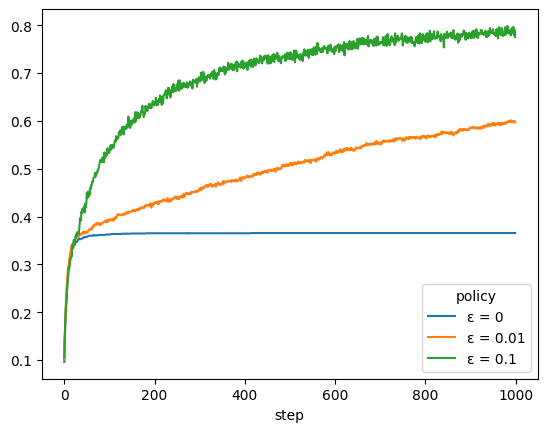

In [6]:
colors = {
    'ε = 0.1': 'tab:blue',
    'ε = 0.01': 'tab:red',
    'ε = 0': 'tab:green'
}

(
    trace_df
    .groupby(['step', 'policy'])
    ['is_action_optimal'].mean()
    .unstack()
    .plot()
)


## Handling drift

The environment used above is a toy situation used for introducing bandits. It is stationary, meaning that the expected reward of each arm does not change over time.

In practice, arms are dynamic, and their performance can vary over time. A simple example of this is the [Candy Cane Contest](https://www.kaggle.com/c/santa-2020) that was hosted on Kaggle in 2020. The expected reward of each arm diminishes each time it is pulled.

The way bandit policies in River deal with drift depends on the method. For the `bandit.EpsilonGreedy` policy, it makes sense to use a rolling average as the reward object. What this means is that the empirical reward the policy calculates for each arm is a rolling average, rather than a global one.

In [7]:
from river import proba, utils

policies=[
    bandit.EpsilonGreedy(
        epsilon=0.1,
        seed=42
    ),
    bandit.EpsilonGreedy(
        epsilon=0.3,
        reward_obj=utils.Rolling(stats.Mean(), window_size=50),
        seed=42
    ),
    bandit.ThompsonSampling(
        reward_obj=proba.Beta(),
        seed=42
    )
]

env = gym.make('river_bandits/CandyCaneContest-v0')

trace = bandit.evaluate(
    policies=policies,
    env=env,
    n_episodes=(n_episodes := 30),
    seed=42
)

trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))


  0%|          | 0/180000 [00:00<?, ?it/s]

  0%|          | 228/180000 [00:00<01:18, 2276.69it/s]

  1%|          | 1160/180000 [00:00<00:27, 6416.93it/s]

  1%|          | 2062/180000 [00:00<00:23, 7604.97it/s]

  2%|▏         | 2959/180000 [00:00<00:21, 8143.01it/s]

  2%|▏         | 3852/180000 [00:00<00:20, 8425.33it/s]

  3%|▎         | 4746/180000 [00:00<00:20, 8595.40it/s]

  3%|▎         | 5647/180000 [00:00<00:19, 8729.04it/s]

  4%|▎         | 6520/180000 [00:00<00:20, 8611.80it/s]

  4%|▍         | 7416/180000 [00:00<00:19, 8715.40it/s]

  5%|▍         | 8301/180000 [00:01<00:19, 8751.49it/s]

  5%|▌         | 9195/180000 [00:01<00:19, 8803.07it/s]

  6%|▌         | 10083/180000 [00:01<00:19, 8825.35it/s]

  6%|▌         | 10968/180000 [00:01<00:19, 8831.53it/s]

  7%|▋         | 11852/180000 [00:01<00:19, 8830.65it/s]

  7%|▋         | 12736/180000 [00:01<00:19, 8697.00it/s]

  8%|▊         | 13612/180000 [00:01<00:19, 8715.33it/s]

  8%|▊         | 14487/180000 [00:01<00:18, 8722.98it/s]

  9%|▊         | 15364/180000 [00:01<00:18, 8736.66it/s]

  9%|▉         | 16248/180000 [00:01<00:18, 8764.19it/s]

 10%|▉         | 17125/180000 [00:02<00:18, 8750.16it/s]

 10%|█         | 18001/180000 [00:02<00:18, 8572.33it/s]

 11%|█         | 18905/180000 [00:02<00:18, 8710.20it/s]

 11%|█         | 19792/180000 [00:02<00:18, 8756.31it/s]

 11%|█▏        | 20684/180000 [00:02<00:18, 8804.98it/s]

 12%|█▏        | 21576/180000 [00:02<00:17, 8832.90it/s]

 12%|█▏        | 22473/180000 [00:02<00:17, 8873.72it/s]

 13%|█▎        | 23361/180000 [00:02<00:17, 8873.79it/s]

 13%|█▎        | 24249/180000 [00:02<00:18, 8646.31it/s]

 14%|█▍        | 25161/180000 [00:02<00:17, 8781.51it/s]

 14%|█▍        | 26041/180000 [00:03<00:17, 8777.95it/s]

 15%|█▍        | 26920/180000 [00:03<00:17, 8772.55it/s]

 15%|█▌        | 27798/180000 [00:03<00:17, 8764.12it/s]

 16%|█▌        | 28675/180000 [00:03<00:17, 8740.42it/s]

 16%|█▋        | 29556/180000 [00:03<00:17, 8755.51it/s]

 17%|█▋        | 30432/180000 [00:03<00:17, 8616.76it/s]

 17%|█▋        | 31344/180000 [00:03<00:16, 8760.46it/s]

 18%|█▊        | 32244/180000 [00:03<00:16, 8826.58it/s]

 18%|█▊        | 33135/180000 [00:03<00:16, 8845.67it/s]

 19%|█▉        | 34023/180000 [00:03<00:16, 8850.48it/s]

 19%|█▉        | 34909/180000 [00:04<00:16, 8825.64it/s]

 20%|█▉        | 35792/180000 [00:04<00:16, 8823.39it/s]

 20%|██        | 36675/180000 [00:04<00:16, 8674.49it/s]

 21%|██        | 37567/180000 [00:04<00:16, 8746.03it/s]

 21%|██▏       | 38456/180000 [00:04<00:16, 8787.88it/s]

 22%|██▏       | 39348/180000 [00:04<00:15, 8821.75it/s]

 22%|██▏       | 40245/180000 [00:04<00:15, 8862.03it/s]

 23%|██▎       | 41133/180000 [00:04<00:15, 8867.14it/s]

 23%|██▎       | 42020/180000 [00:04<00:16, 8549.44it/s]

 24%|██▍       | 42977/180000 [00:04<00:15, 8846.77it/s]

 24%|██▍       | 43869/180000 [00:05<00:15, 8867.13it/s]

 25%|██▍       | 44766/180000 [00:05<00:15, 8894.54it/s]

 25%|██▌       | 45657/180000 [00:05<00:15, 8882.44it/s]

 26%|██▌       | 46547/180000 [00:05<00:15, 8851.69it/s]

 26%|██▋       | 47435/180000 [00:05<00:14, 8858.79it/s]

 27%|██▋       | 48322/180000 [00:05<00:15, 8643.94it/s]

 27%|██▋       | 49221/180000 [00:05<00:14, 8739.49it/s]

 28%|██▊       | 50097/180000 [00:05<00:14, 8714.61it/s]

 28%|██▊       | 50976/180000 [00:05<00:14, 8735.51it/s]

 29%|██▉       | 51852/180000 [00:05<00:14, 8736.34it/s]

 29%|██▉       | 52727/180000 [00:06<00:14, 8736.25it/s]

 30%|██▉       | 53601/180000 [00:06<00:14, 8728.64it/s]

 30%|███       | 54475/180000 [00:06<00:14, 8576.51it/s]

 31%|███       | 55356/180000 [00:06<00:14, 8642.59it/s]

 31%|███       | 56229/180000 [00:06<00:14, 8667.31it/s]

 32%|███▏      | 57100/180000 [00:06<00:14, 8679.87it/s]

 32%|███▏      | 57975/180000 [00:06<00:14, 8697.07it/s]

 33%|███▎      | 58851/180000 [00:06<00:13, 8711.01it/s]

 33%|███▎      | 59724/180000 [00:06<00:13, 8710.68it/s]

 34%|███▎      | 60596/180000 [00:06<00:13, 8564.63it/s]

 34%|███▍      | 61482/180000 [00:07<00:13, 8651.29it/s]

 35%|███▍      | 62367/180000 [00:07<00:13, 8706.40it/s]

 35%|███▌      | 63258/180000 [00:07<00:13, 8761.91it/s]

 36%|███▌      | 64140/180000 [00:07<00:13, 8773.36it/s]

 36%|███▌      | 65022/180000 [00:07<00:13, 8786.46it/s]

 37%|███▋      | 65904/180000 [00:07<00:12, 8794.72it/s]

 37%|███▋      | 66784/180000 [00:07<00:13, 8643.94it/s]

 38%|███▊      | 67662/180000 [00:07<00:12, 8678.47it/s]

 38%|███▊      | 68531/180000 [00:07<00:12, 8659.84it/s]

 39%|███▊      | 69398/180000 [00:07<00:12, 8621.56it/s]

 39%|███▉      | 70267/180000 [00:08<00:12, 8641.85it/s]

 40%|███▉      | 71142/180000 [00:08<00:12, 8671.71it/s]

 40%|████      | 72010/180000 [00:08<00:12, 8330.11it/s]

 41%|████      | 72954/180000 [00:08<00:12, 8651.62it/s]

 41%|████      | 73837/180000 [00:08<00:12, 8702.63it/s]

 42%|████▏     | 74719/180000 [00:08<00:12, 8736.26it/s]

 42%|████▏     | 75595/180000 [00:08<00:11, 8740.05it/s]

 42%|████▏     | 76471/180000 [00:08<00:11, 8737.17it/s]

 43%|████▎     | 77346/180000 [00:08<00:11, 8736.01it/s]

 43%|████▎     | 78221/180000 [00:09<00:11, 8533.47it/s]

 44%|████▍     | 79137/180000 [00:09<00:11, 8713.06it/s]

 44%|████▍     | 80017/180000 [00:09<00:11, 8738.40it/s]

 45%|████▍     | 80892/180000 [00:09<00:11, 8735.88it/s]

 45%|████▌     | 81767/180000 [00:09<00:11, 8731.86it/s]

 46%|████▌     | 82641/180000 [00:09<00:11, 8700.37it/s]

 46%|████▋     | 83517/180000 [00:09<00:11, 8712.26it/s]

 47%|████▋     | 84389/180000 [00:09<00:11, 8542.71it/s]

 47%|████▋     | 85281/180000 [00:09<00:10, 8650.61it/s]

 48%|████▊     | 86151/180000 [00:09<00:10, 8662.85it/s]

 48%|████▊     | 87018/180000 [00:10<00:10, 8636.22it/s]

 49%|████▉     | 87883/180000 [00:10<00:10, 8619.25it/s]

 49%|████▉     | 88746/180000 [00:10<00:10, 8621.63it/s]

 50%|████▉     | 89613/180000 [00:10<00:10, 8630.41it/s]

 50%|█████     | 90477/180000 [00:10<00:10, 8475.90it/s]

 51%|█████     | 91366/180000 [00:10<00:10, 8595.91it/s]

 51%|█████▏    | 92250/180000 [00:10<00:10, 8662.81it/s]

 52%|█████▏    | 93132/180000 [00:10<00:09, 8707.95it/s]

 52%|█████▏    | 94011/180000 [00:10<00:09, 8731.21it/s]

 53%|█████▎    | 94892/180000 [00:10<00:09, 8754.08it/s]

 53%|█████▎    | 95775/180000 [00:11<00:09, 8771.37it/s]

 54%|█████▎    | 96653/180000 [00:11<00:09, 8631.59it/s]

 54%|█████▍    | 97538/180000 [00:11<00:09, 8695.93it/s]

 55%|█████▍    | 98409/180000 [00:11<00:09, 8686.41it/s]

 55%|█████▌    | 99285/180000 [00:11<00:09, 8707.60it/s]

 56%|█████▌    | 100159/180000 [00:11<00:09, 8716.60it/s]

 56%|█████▌    | 101037/180000 [00:11<00:09, 8730.51it/s]

 57%|█████▋    | 101911/180000 [00:11<00:08, 8728.51it/s]

 57%|█████▋    | 102784/180000 [00:11<00:08, 8611.69it/s]

 58%|█████▊    | 103659/180000 [00:11<00:08, 8648.97it/s]

 58%|█████▊    | 104529/180000 [00:12<00:08, 8659.87it/s]

 59%|█████▊    | 105405/180000 [00:12<00:08, 8687.67it/s]

 59%|█████▉    | 106280/180000 [00:12<00:08, 8706.00it/s]

 60%|█████▉    | 107151/180000 [00:12<00:08, 8693.48it/s]

 60%|██████    | 108021/180000 [00:12<00:08, 8403.56it/s]

 61%|██████    | 108957/180000 [00:12<00:08, 8682.11it/s]

 61%|██████    | 109834/180000 [00:12<00:08, 8707.42it/s]

 62%|██████▏   | 110707/180000 [00:12<00:07, 8708.82it/s]

 62%|██████▏   | 111583/180000 [00:12<00:07, 8722.87it/s]

 62%|██████▏   | 112467/180000 [00:12<00:07, 8755.05it/s]

 63%|██████▎   | 113351/180000 [00:13<00:07, 8780.13it/s]

 63%|██████▎   | 114230/180000 [00:13<00:07, 8560.33it/s]

 64%|██████▍   | 115134/180000 [00:13<00:07, 8697.25it/s]

 64%|██████▍   | 116011/180000 [00:13<00:07, 8718.23it/s]

 65%|██████▍   | 116895/180000 [00:13<00:07, 8751.07it/s]

 65%|██████▌   | 117777/180000 [00:13<00:07, 8766.32it/s]

 66%|██████▌   | 118656/180000 [00:13<00:06, 8767.66it/s]

 66%|██████▋   | 119534/180000 [00:13<00:06, 8770.56it/s]

 67%|██████▋   | 120412/180000 [00:13<00:06, 8578.63it/s]

 67%|██████▋   | 121296/180000 [00:13<00:06, 8653.17it/s]

 68%|██████▊   | 122175/180000 [00:14<00:06, 8693.47it/s]

 68%|██████▊   | 123054/180000 [00:14<00:06, 8718.74it/s]

 69%|██████▉   | 123936/180000 [00:14<00:06, 8746.06it/s]

 69%|██████▉   | 124811/180000 [00:14<00:06, 8746.85it/s]

 70%|██████▉   | 125686/180000 [00:14<00:06, 8738.55it/s]

 70%|███████   | 126561/180000 [00:14<00:06, 8568.13it/s]

 71%|███████   | 127435/180000 [00:14<00:06, 8618.70it/s]

 71%|███████▏  | 128301/180000 [00:14<00:05, 8625.95it/s]

 72%|███████▏  | 129168/180000 [00:14<00:05, 8638.56it/s]

 72%|███████▏  | 130041/180000 [00:14<00:05, 8660.88it/s]

 73%|███████▎  | 130911/180000 [00:15<00:05, 8667.82it/s]

 73%|███████▎  | 131778/180000 [00:15<00:05, 8659.29it/s]

 74%|███████▎  | 132645/180000 [00:15<00:05, 8528.18it/s]

 74%|███████▍  | 133515/180000 [00:15<00:05, 8574.34it/s]

 75%|███████▍  | 134385/180000 [00:15<00:05, 8609.06it/s]

 75%|███████▌  | 135249/180000 [00:15<00:05, 8616.24it/s]

 76%|███████▌  | 136119/180000 [00:15<00:05, 8641.04it/s]

 76%|███████▌  | 136989/180000 [00:15<00:04, 8656.42it/s]

 77%|███████▋  | 137862/180000 [00:15<00:04, 8677.23it/s]

 77%|███████▋  | 138730/180000 [00:15<00:04, 8548.31it/s]

 78%|███████▊  | 139608/180000 [00:16<00:04, 8612.52it/s]

 78%|███████▊  | 140485/180000 [00:16<00:04, 8658.07it/s]

 79%|███████▊  | 141366/180000 [00:16<00:04, 8703.25it/s]

 79%|███████▉  | 142242/180000 [00:16<00:04, 8719.82it/s]

 80%|███████▉  | 143120/180000 [00:16<00:04, 8736.53it/s]

 80%|███████▉  | 143994/180000 [00:16<00:04, 8725.48it/s]

 80%|████████  | 144867/180000 [00:16<00:04, 7949.74it/s]

 81%|████████  | 145752/180000 [00:16<00:04, 8199.95it/s]

 81%|████████▏ | 146640/180000 [00:16<00:03, 8393.20it/s]

 82%|████████▏ | 147536/180000 [00:17<00:03, 8557.09it/s]

 82%|████████▏ | 148431/180000 [00:17<00:03, 8667.97it/s]

 83%|████████▎ | 149319/180000 [00:17<00:03, 8724.86it/s]

 83%|████████▎ | 150196/180000 [00:17<00:03, 8520.49it/s]

 84%|████████▍ | 151122/180000 [00:17<00:03, 8731.53it/s]

 84%|████████▍ | 152013/180000 [00:17<00:03, 8779.34it/s]

 85%|████████▍ | 152898/180000 [00:17<00:03, 8797.46it/s]

 85%|████████▌ | 153781/180000 [00:17<00:02, 8805.54it/s]

 86%|████████▌ | 154663/180000 [00:17<00:02, 8782.03it/s]

 86%|████████▋ | 155542/180000 [00:17<00:02, 8754.43it/s]

 87%|████████▋ | 156418/180000 [00:18<00:02, 8585.09it/s]

 87%|████████▋ | 157315/180000 [00:18<00:02, 8696.30it/s]

 88%|████████▊ | 158186/180000 [00:18<00:02, 8648.66it/s]

 88%|████████▊ | 159052/180000 [00:18<00:02, 8627.24it/s]

 89%|████████▉ | 159916/180000 [00:18<00:02, 8624.47it/s]

 89%|████████▉ | 160780/180000 [00:18<00:02, 8628.37it/s]

 90%|████████▉ | 161644/180000 [00:18<00:02, 8612.29it/s]

 90%|█████████ | 162506/180000 [00:18<00:02, 8457.75it/s]

 91%|█████████ | 163398/180000 [00:18<00:01, 8588.86it/s]

 91%|█████████▏| 164281/180000 [00:18<00:01, 8659.49it/s]

 92%|█████████▏| 165162/180000 [00:19<00:01, 8702.76it/s]

 92%|█████████▏| 166041/180000 [00:19<00:01, 8723.64it/s]

 93%|█████████▎| 166919/180000 [00:19<00:01, 8740.42it/s]

 93%|█████████▎| 167794/180000 [00:19<00:01, 8722.01it/s]

 94%|█████████▎| 168667/180000 [00:19<00:01, 8572.18it/s]

 94%|█████████▍| 169548/180000 [00:19<00:01, 8639.21it/s]

 95%|█████████▍| 170428/180000 [00:19<00:01, 8685.64it/s]

 95%|█████████▌| 171303/180000 [00:19<00:00, 8704.33it/s]

 96%|█████████▌| 172186/180000 [00:19<00:00, 8741.00it/s]

 96%|█████████▌| 173061/180000 [00:19<00:00, 8740.53it/s]

 97%|█████████▋| 173936/180000 [00:20<00:00, 8655.22it/s]

 97%|█████████▋| 174802/180000 [00:20<00:00, 8490.06it/s]

 98%|█████████▊| 175686/180000 [00:20<00:00, 8588.99it/s]

 98%|█████████▊| 176568/180000 [00:20<00:00, 8653.44it/s]

 99%|█████████▊| 177458/180000 [00:20<00:00, 8726.12it/s]

 99%|█████████▉| 178341/180000 [00:20<00:00, 8752.29it/s]

100%|█████████▉| 179225/180000 [00:20<00:00, 8777.98it/s]

100%|██████████| 180000/180000 [00:20<00:00, 8669.71it/s]

We can compare the performance of each policy by checking the average reward at the end of each episode.

In [8]:
(
    trace_df
    .groupby(['policy_idx', 'episode'])
    .last()
    .groupby('policy_idx')
    .reward_stat.mean()
)



policy_idx
0    736.1
1    817.0
2    854.0
Name: reward_stat, dtype: float64

We see that using a rolling average gives a boost to the epsilon greedy strategy. However, we see that the `bandit.ThompsonSampling` policy performs even better, even though no particular care was given to drift. A natural next step would thus be to see how it could be improved to handle drift. For instance, its `dist` parameter could be wrapped with a `utils.Rolling`:

In [9]:
policy = bandit.ThompsonSampling(
    reward_obj=utils.Rolling(proba.Beta(), window_size=50),
    seed=42
)


Bandits can be used for several tasks. They can be used for content personalization, as well as online model selection (see `model_selection.BanditRegressor`). The policies in River are therefore designed to be flexible, so that they can be used in conjunction with other River modules. For instance, the `reward_obj` in `bandit.EpsilonGreedy` can be a metric, a probability distribution, or a statistic. This works because objects in River adher to a coherent get/update interface.